# Note:
PCA (Principal Component Analysis)
MI (Mutual Information - Th√¥ng tin T∆∞∆°ng h·ªó)
IQR (Interquartile Range)

https://www.kaggle.com/datasets/nguyentiennhan/vietnam-housing-dataset-2024

In [ ]:
# G·ª° c√°c phi√™n b·∫£n c≈© ƒë·ªÉ tr√°nh xung ƒë·ªôt
!pip uninstall -y keras scikit-learn numpy scikeras tensorflow


!pip install tensorflow==2.18.0
!pip install keras==3.5.0
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install scikit-learn==1.6.1
!pip install scikeras==0.13.0
!pip install joblib==1.2.0
!pip install matplotlib==3.8.0

Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import os
import re
import tensorflow as tf

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from tensorflow import keras
from keras.models import Sequential, load_model
from scikeras.wrappers import KerasRegressor
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

import keras.losses
from keras.models import load_model
from keras.losses import MeanSquaredError
from keras.metrics import MeanAbsoluteError

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import cloudpickle
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
import os


ModuleNotFoundError: No module named 'scikeras'

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

In [ ]:
# ƒê·∫£m b·∫£o th∆∞ m·ª•c l∆∞u tr·ªØ t·ªìn t·∫°i
save_dir = "/content/drive/MyDrive/DoAnTotNghiep/test"


folder_path = "/content/drive/MyDrive/DoAnTotNghiep/data"
if os.path.exists(folder_path):
    print("Th∆∞ m·ª•c ƒë√£ k·∫øt n·ªëi th√†nh c√¥ng!")
else:
    print("Th∆∞ m·ª•c kh√¥ng t·ªìn t·∫°i, vui l√≤ng ki·ªÉm tra l·∫°i.")
file_path = folder_path + "/vietnam_housing_dataset.csv"
house_data = pd.read_csv(file_path)
house_data.head()

Th∆∞ m·ª•c ƒë√£ k·∫øt n·ªëi th√†nh c√¥ng!


Address  Area  Frontage  Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms      Legal status Furniture state  Price
0  D·ª± √°n The Empire - Vinhomes Ocean Park 2, X√£ L...  84.0       NaN          NaN             NaN               NaN     4.0       NaN        NaN  Have certificate             NaN   8.60
1  D·ª± √°n The Crown - Vinhomes Ocean Park 3, X√£ Ng...  60.0       NaN          NaN             NaN               NaN     5.0       NaN        NaN               NaN             NaN   7.50
2  D·ª± √°n The Crown - Vinhomes Ocean Park 3, X√£ Ng...  90.0       6.0         13.0      ƒê√¥ng - B·∫Øc        ƒê√¥ng - B·∫Øc     5.0       NaN        NaN     Sale contract             NaN   8.90
3  ƒê∆∞·ªùng Nguy·ªÖn VƒÉn Kh·ªëi, Ph∆∞·ªùng 11, G√≤ V·∫•p, H·ªì C...  54.0       NaN          3.5       T√¢y - Nam         T√¢y - Nam     2.0       2.0        3.0  Have certificate            Full   5.35
4   ƒê∆∞·ªùng Quang Trung, Ph∆∞·ªùng 8, G√≤ V·∫•p, H·ªì Ch√≠ Minh  92.0       NaN          NaN      ƒê√¥ng - Nam        ƒê√¥ng - Nam     2.0       4.0        4.0  Have certificate            Full   6.90

In [ ]:
addresses = []
for address in house_data['Address']:
  if address.split(",")[-1][1:] not in addresses:
      addresses.append(address.split(",")[-1][1:])
print(len(addresses))
print(addresses)

107
['H∆∞ng Y√™n', 'H·ªì Ch√≠ Minh', 'H√† N·ªôi', 'Qu·∫£ng Ninh', 'B√¨nh D∆∞∆°ng', 'Ph√∫ Th·ªç', 'H√† N·ªôi.', 'H·∫£i D∆∞∆°ng', 'Long An', 'Ki√™n Giang', 'B√¨nh Thu·∫≠n', 'H·∫£i Ph√≤ng', 'H√† Nam', 'B√† R·ªãa V≈©ng T√†u', 'H·ªì Ch√≠ Minh gi√° 2t·ª∑380', 'ƒê·∫Øk L·∫Øk.', 'B·∫Øc Ninh', 'Thanh H√≥a.', 'Kh√°nh H√≤a', 'H∆∞ng Y√™n.', 'ƒê√† N·∫µng', 'Th√°i Nguy√™n.', 'Qu·∫£ng Tr·ªã', 'Ph√∫ Th·ªç.', 'ƒê·ªìng Nai', 'Thanh H√≥a', 'ƒê·ªìng Nai.', 'Tuy√™n Quang', 'Kh√°nh H√≤a.', 'Ninh Thu·∫≠n', 'Ngh·ªá An', 'C·∫ßn Th∆°', 'Th√°i B√¨nh', 'B·∫Øc Giang.', 'L√¢m ƒê·ªìng', 'Tr√† Vinh', 'B·∫Øc Ninh.', 'B√¨nh Ph∆∞·ªõc', 'Th√°i Nguy√™n', 'Qu·∫£ng Nam', 'H√≤a B√¨nh', 'H·ªì Ch√≠ Minh.', 'Th·ª´a Thi√™n Hu·∫ø', 'S∆°n La', 'B√¨nh ƒê·ªãnh', 'B√† R·ªãa V≈©ng T√†u.', 'Vƒ©nh Ph√∫c', 'ƒê√† N·∫µng.', 'T√¢y Ninh', 'Ti·ªÅn Giang', 'B√¨nh D∆∞∆°ng.', 'ƒê·∫Øk L·∫Øk', 'H√† Tƒ©nh', 'L·∫°ng S∆°n', 'HaÃÄ N√¥Ã£i', 'L√†o Cai', 'L√¢m ƒê·ªìng.', 'ƒêi·ªán Bi√™n', 'Gia Lai', 'Long An.', 'B·∫Øc Giang', '∆∞·ªùng s·ªë 11', 'Ph√∫ Y√™n'

In [ ]:
# B∆∞·ªõc 1: Tr√≠ch xu·∫•t t·ªânh/th√†nh ph·ªë t·ª´ address
house_data['province_extracted'] = house_data['Address'].str.split(',').str[-1].str.strip()

Ch√∫ng ta c√≥ th·ªÉ th·∫•y r·∫±ng c√°c t√™n c·ªßa th√†nh ph·ªë v·∫´n c√≤n nhi·ªÅu ƒëi·ªÉm sai v√† b·ªã v∆∞·ªõng c√°c m√¥ t·∫£ ho·∫∑c ch∆∞a ƒë√∫ng.
C·∫ßn l√†m s·∫°ch l·∫°i c√°c gi√° tr·ªã n√†y ƒë·ªÉ ti·∫øp t·ª•c ph√¢n t√≠ch v·ªÅ Qu·∫≠n v√† Th√†nh Ph·ªë

T·∫°o h√†m chu·∫©n h√≥a c√°c v·∫•n ƒë·ªÅ tr√™n

In [ ]:
# B∆∞·ªõc 2: Chu·∫©n h√≥a t√™n t·ªânh/th√†nh ph·ªë
province_mapping = {
    'TPHCM': 'H·ªì Ch√≠ Minh', 'TpHCM': 'H·ªì Ch√≠ Minh', 'TP. HCM': 'H·ªì Ch√≠ Minh',
    'TP H·ªì Ch√≠ Minh': 'H·ªì Ch√≠ Minh', 'H·ªì Ch√≠ M√≠nh': 'H·ªì Ch√≠ Minh', 'H·ªì Ch√≠ Minh.': 'H·ªì Ch√≠ Minh',
    'HaÃÄ N√¥Ã£i': 'H√† N·ªôi', 'HN': 'H√† N·ªôi', 'H√† N·ªôi.': 'H√† N·ªôi',
    'ƒê√† N·∫µng.': 'ƒê√† N·∫µng', 'ƒê√† N·∫µng': 'ƒê√† N·∫µng',
    'C·∫ßn Th∆°.': 'C·∫ßn Th∆°', 'C·∫ßn Th∆°': 'C·∫ßn Th∆°',
    'H∆∞ng Y√™n.': 'H∆∞ng Y√™n', 'Kh√°nh H√≤a.': 'Kh√°nh H√≤a',
    'B√¨nh D∆∞∆°ng.': 'B√¨nh D∆∞∆°ng', 'B√¨nh D∆∞∆°ng (g·∫ßn cafe X√≥m V·∫Øng 2)': 'B√¨nh D∆∞∆°ng',
    'Qu·∫£ng Ninh (Ng√£ 3 ƒë∆∞·ªùng H√≤n Gai c≈©)': 'Qu·∫£ng Ninh',
    'B√† R·ªãa V≈©ng T√†u.': 'B√† R·ªãa V≈©ng T√†u',
    'Long An.': 'Long An'
}

house_data['province_cleaned'] = house_data['province_extracted'].replace(province_mapping)
house_data['province_cleaned'] = house_data['province_cleaned'].str.replace(r'[^A-Za-z√Ä-·ªπ\s]', '', regex=True).str.strip()

In [ ]:
major_cities = {
    'H·ªì Ch√≠ Minh': ['Qu·∫≠n 1', 'Qu·∫≠n 3', 'Qu·∫≠n 5', 'Qu·∫≠n 10', 'B√¨nh Th·∫°nh', 'Ph√∫ Nhu·∫≠n', 'Qu·∫≠n 7'],
    'H√† N·ªôi': ['Ba ƒê√¨nh', 'Ho√†n Ki·∫øm', 'ƒê·ªëng ƒêa', 'Hai B√† Tr∆∞ng', 'C·∫ßu Gi·∫•y', 'Thanh Xu√¢n', 'T√¢y H·ªì'],
    'ƒê√† N·∫µng': ['H·∫£i Ch√¢u'],
    'C·∫ßn Th∆°': ['Ninh Ki·ªÅu'],
    'B√¨nh D∆∞∆°ng': ['Th·ªß D·∫ßu M·ªôt'],
    'H·∫£i Ph√≤ng': ['H·ªìng B√†ng', 'L√™ Ch√¢n'],
    'Kh√°nh H√≤a': ['Nha Trang'],
    'Qu·∫£ng Ninh': ['H·∫° Long']
}
# H√†m ki·ªÉm tra xem ƒë·ªãa ch·ªâ c√≥ thu·ªôc th√†nh ph·ªë l·ªõn kh√¥ng
def check_major_city(row):
    city = row['province_cleaned']
    if city in major_cities:
        return 1
    return 0

def get_major_city_name(row):
    city = row['province_cleaned']
    if city in major_cities:
        return city
    return 'Kh√°c'

# √Åp d·ª•ng
house_data['is_major_city'] = house_data.apply(check_major_city, axis=1)
house_data['major_city_name'] = house_data.apply(get_major_city_name, axis=1)

In [ ]:
center_districts_hcm = ['Qu·∫≠n 1', 'Qu·∫≠n 3', 'Qu·∫≠n 5', 'Qu·∫≠n 10', 'Qu·∫≠n 4']
center_districts_hn = ['Ho√†n Ki·∫øm', 'ƒê·ªëng ƒêa', 'Hai B√† Tr∆∞ng', 'Ba ƒê√¨nh', 'Thanh Xu√¢n', 'C·∫ßu Gi·∫•y']

def is_center_district(row):
    if row['major_city_name'] == 'H·ªì Ch√≠ Minh' and any(d in row['Address'] for d in center_districts_hcm):
        return 1
    elif row['major_city_name'] == 'H√† N·ªôi' and any(d in row['Address'] for d in center_districts_hn):
        return 1
    return 0

house_data['is_center_district'] = house_data.apply(is_center_district, axis=1)
house_data.drop("province_extracted", axis = 1, inplace= True)

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             30229 non-null  object 
 1   Area                30229 non-null  float64
 2   Frontage            18665 non-null  float64
 3   Access Road         16932 non-null  float64
 4   House direction     8990 non-null   object 
 5   Balcony direction   5246 non-null   object 
 6   Floors              26626 non-null  float64
 7   Bedrooms            25067 non-null  float64
 8   Bathrooms           23155 non-null  float64
 9   Legal status        25723 non-null  object 
 10  Furniture state     16110 non-null  object 
 11  Price               30229 non-null  float64
 12  province_cleaned    30229 non-null  object 
 13  is_major_city       30229 non-null  int64  
 14  major_city_name     30229 non-null  object 
 15  is_center_district  30229 non-null  int64  
dtypes: f

# EDA and Feature Engineering

In [ ]:
north = [
    'H√† N·ªôi', 'H·∫£i Ph√≤ng', 'Qu·∫£ng Ninh', 'B·∫Øc Ninh', 'B·∫Øc Giang', 'H√† Nam', 'Nam ƒê·ªãnh',
    'Th√°i B√¨nh', 'Ninh B√¨nh', 'H∆∞ng Y√™n', 'Vƒ©nh Ph√∫c', 'Ph√∫ Th·ªç', 'Tuy√™n Quang',
    'Th√°i Nguy√™n', 'Cao B·∫±ng', 'L·∫°ng S∆°n', 'H√† Giang', 'Y√™n B√°i', 'L√†o Cai', 'S∆°n La',
    'ƒêi·ªán Bi√™n', 'Lai Ch√¢u', 'B·∫Øc K·∫°n'
]

central = [
    'ƒê√† N·∫µng', 'Th·ª´a Thi√™n Hu·∫ø', 'Qu·∫£ng Nam', 'Qu·∫£ng Ng√£i', 'B√¨nh ƒê·ªãnh', 'Ph√∫ Y√™n',
    'Kh√°nh H√≤a', 'Ninh Thu·∫≠n', 'B√¨nh Thu·∫≠n', 'Kon Tum', 'Gia Lai', 'ƒê·∫Øk L·∫Øk',
    'ƒê·∫Øk N√¥ng', 'L√¢m ƒê·ªìng', 'Thanh H√≥a', 'Ngh·ªá An', 'H√† Tƒ©nh', 'Qu·∫£ng B√¨nh',
    'Qu·∫£ng Tr·ªã'
]

south = [
    'H·ªì Ch√≠ Minh', 'TP. HCM', 'HCM', 'C·∫ßn Th∆°', 'B√¨nh D∆∞∆°ng', 'B√¨nh Ph∆∞·ªõc', 'ƒê·ªìng Nai',
    'T√¢y Ninh', 'B√† R·ªãa V≈©ng T√†u', 'Long An', 'Ti·ªÅn Giang', 'B·∫øn Tre', 'Vƒ©nh Long',
    'Tr√† Vinh', 'H·∫≠u Giang', 'S√≥c TrƒÉng', 'An Giang', 'ƒê·ªìng Th√°p', 'C√† Mau', 'B·∫°c Li√™u',
    'Ki√™n Giang'
]
def get_region(province):
    if province in north:
        return 'North'
    elif province in central:
        return 'Central'
    elif province in south:
        return 'South'
    return 'Other'

house_data['region'] = house_data['province_cleaned'].apply(get_region)

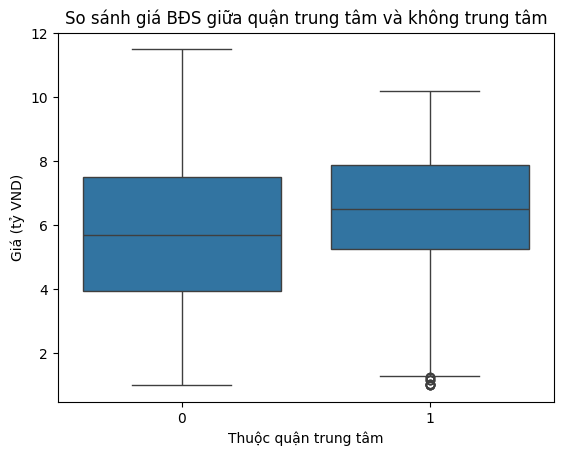

In [ ]:
sns.boxplot(data=house_data, x='is_center_district', y='Price')
plt.title('So s√°nh gi√° BƒêS gi·ªØa qu·∫≠n trung t√¢m v√† kh√¥ng trung t√¢m')
plt.xlabel('Thu·ªôc qu·∫≠n trung t√¢m')
plt.ylabel('Gi√° (t·ª∑ VND)')
plt.show()

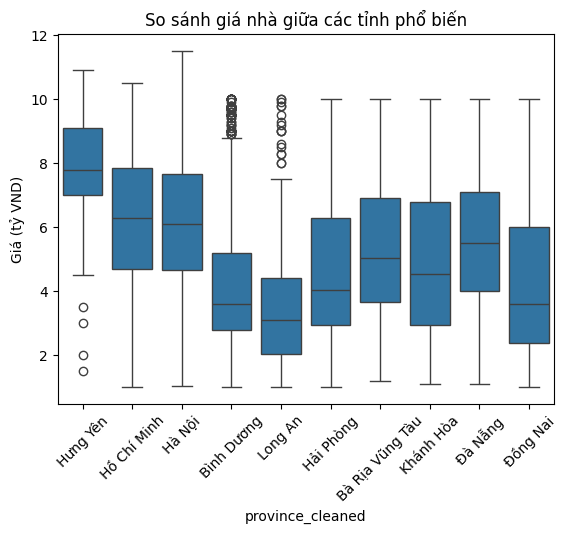

In [ ]:
top_provinces = house_data['province_cleaned'].value_counts().nlargest(10).index
sns.boxplot(data=house_data[house_data['province_cleaned'].isin(top_provinces)],
            x='province_cleaned', y='Price')
plt.xticks(rotation=45)
plt.title('So s√°nh gi√° nh√† gi·ªØa c√°c t·ªânh ph·ªï bi·∫øn')
plt.ylabel('Gi√° (t·ª∑ VND)')
plt.show()

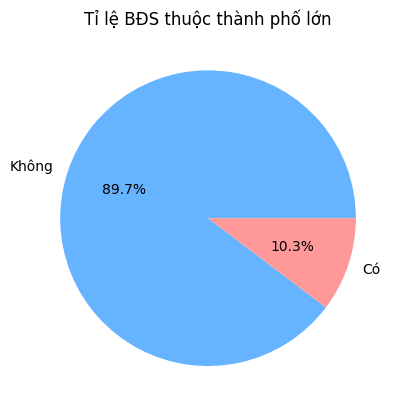

In [ ]:
house_data['is_major_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Kh√¥ng', 'C√≥'], colors=['#66b3ff','#ff9999'])
plt.title('T·ªâ l·ªá BƒêS thu·ªôc th√†nh ph·ªë l·ªõn')
plt.ylabel('')
plt.show()

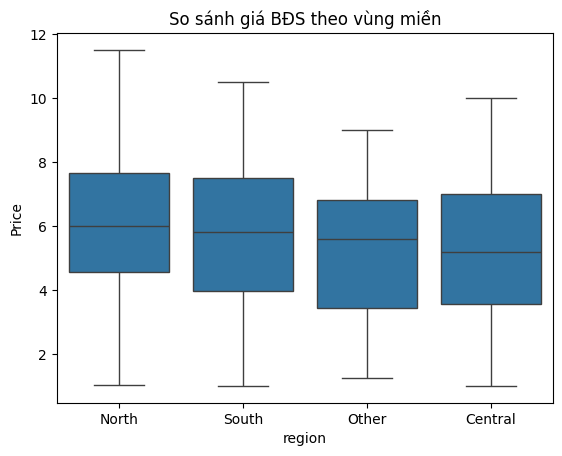

In [ ]:
sns.boxplot(data=house_data, x='region', y='Price')
plt.title('So s√°nh gi√° BƒêS theo v√πng mi·ªÅn')
plt.show()

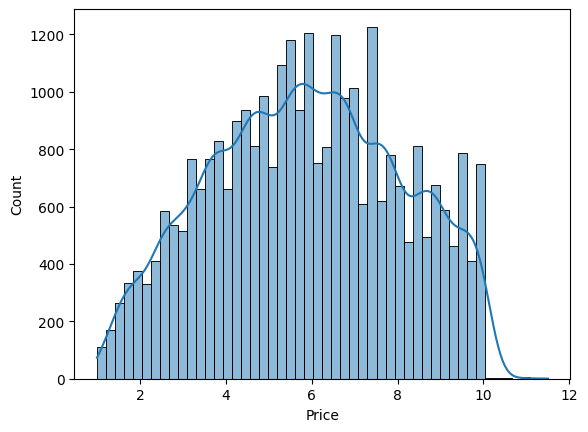

In [ ]:
sns.histplot(house_data['Price'], kde=True)
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')

Trong ƒë√¢y th·∫•y ƒë∆∞·ª£c tr∆∞·ªùng d·ªØ li·ªáu v·ªÅ gi√° c·∫£ kh√¥ng b·ªã h·∫πp hay b·ªã d·ªìn v·ªÅ m·ªôt b√™n m√† tr·∫£i ƒë·ªÅu n√™n kh√¥ng c·∫ßn ph·∫£i thay ƒë·ªïi.

## Numerical Features (C√°c Tr∆∞·ªùng s·ªë h·ªçc)

In [ ]:
# First, we need to fill N/A values
# Filling NaN in floors, bedrooms, and bathrooms with 1.0 since 0 does not make sense
house_data['Floors'].fillna(1, inplace=True)
house_data['Bedrooms'].fillna(1, inplace=True)
house_data['Bathrooms'].fillna(1, inplace=True)

# Filling NaN in Frontage and Access Road with 0
house_data['Frontage'].fillna(0, inplace=True)
house_data['Access Road'].fillna(0, inplace=True)

house_data.head()

Address  Area  Frontage  Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms      Legal status Furniture state  Price province_cleaned  is_major_city major_city_name  is_center_district region
0  D·ª± √°n The Empire - Vinhomes Ocean Park 2, X√£ L...  84.0       0.0          0.0             NaN               NaN     4.0       1.0        1.0  Have certificate             NaN   8.60         H∆∞ng Y√™n              0            Kh√°c                   0  North
1  D·ª± √°n The Crown - Vinhomes Ocean Park 3, X√£ Ng...  60.0       0.0          0.0             NaN               NaN     5.0       1.0        1.0               NaN             NaN   7.50         H∆∞ng Y√™n              0            Kh√°c                   0  North
2  D·ª± √°n The Crown - Vinhomes Ocean Park 3, X√£ Ng...  90.0       6.0         13.0      ƒê√¥ng - B·∫Øc        ƒê√¥ng - B·∫Øc     5.0       1.0        1.0     Sale contract             NaN   8.90         H∆∞ng Y√™n              0            Kh√°c                   0  North
3  ƒê∆∞·ªùng Nguy·ªÖn VƒÉn Kh·ªëi, Ph∆∞·ªùng 11, G√≤ V·∫•p, H·ªì C...  54.0       0.0          3.5       T√¢y - Nam         T√¢y - Nam     2.0       2.0        3.0  Have certificate            Full   5.35      H·ªì Ch√≠ Minh              1     H·ªì Ch√≠ Minh                   0  South
4   ƒê∆∞·ªùng Quang Trung, Ph∆∞·ªùng 8, G√≤ V·∫•p, H·ªì Ch√≠ Minh  92.0       0.0          0.0      ƒê√¥ng - Nam        ƒê√¥ng - Nam     2.0       4.0        4.0  Have certificate            Full   6.90      H·ªì Ch√≠ Minh              1     H·ªì Ch√≠ Minh                   0  South

V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªÉ th·∫•y ƒë∆∞·ª£c s·ª± ph√¢n b·ªï c·ªßa c√°c tr∆∞·ªùng s·ªë h·ªçc so v·ªõi tr∆∞·ªùng gi√° ƒë·ªÉ xem s·ª± ph√¢n b·ªï c·ªßa c√°c gi√° tr·ªã

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             30229 non-null  object 
 1   Area                30229 non-null  float64
 2   Frontage            30229 non-null  float64
 3   Access Road         30229 non-null  float64
 4   House direction     8990 non-null   object 
 5   Balcony direction   5246 non-null   object 
 6   Floors              30229 non-null  float64
 7   Bedrooms            30229 non-null  float64
 8   Bathrooms           30229 non-null  float64
 9   Legal status        25723 non-null  object 
 10  Furniture state     16110 non-null  object 
 11  Price               30229 non-null  float64
 12  province_cleaned    30229 non-null  object 
 13  is_major_city       30229 non-null  int64  
 14  major_city_name     30229 non-null  object 
 15  is_center_district  30229 non-null  int64  
 16  regi

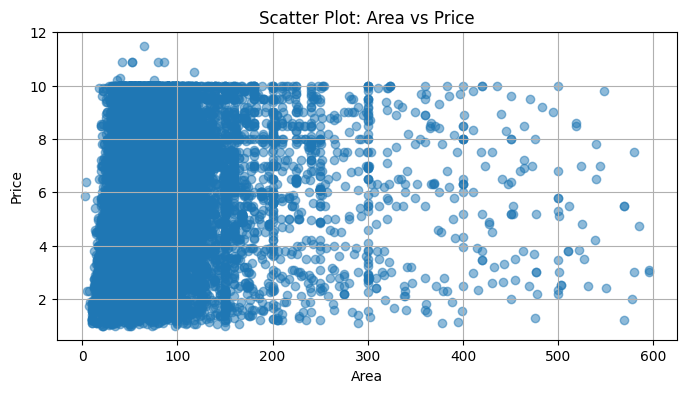

<Figure size 640x480 with 0 Axes>

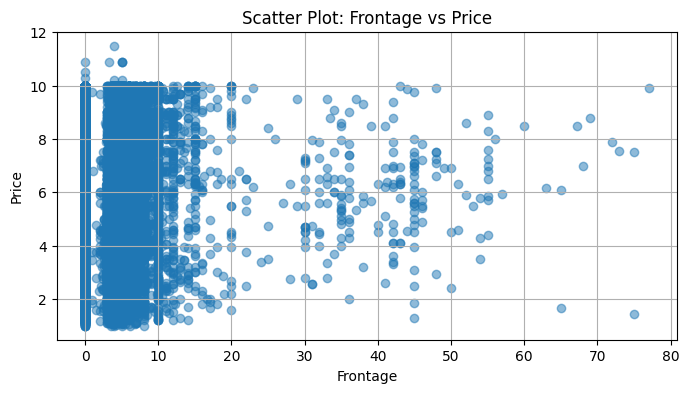

<Figure size 640x480 with 0 Axes>

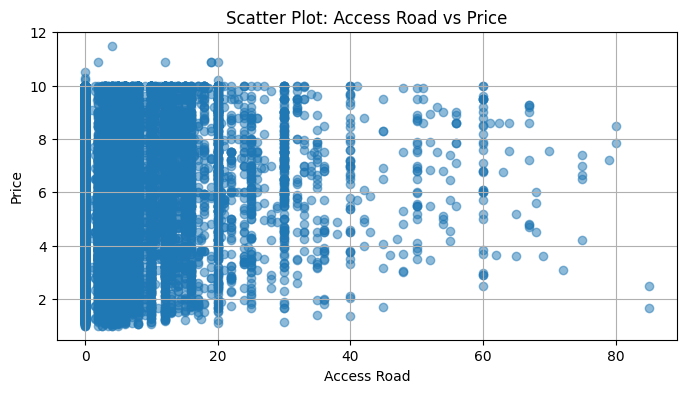

<Figure size 640x480 with 0 Axes>

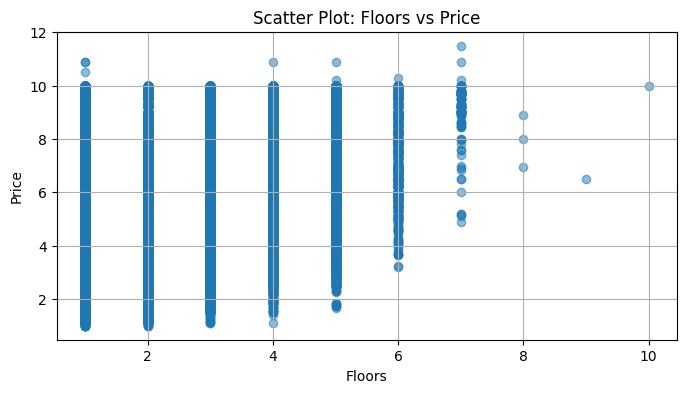

<Figure size 640x480 with 0 Axes>

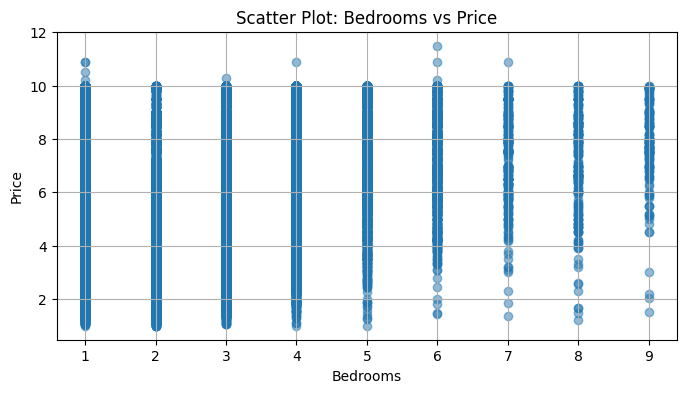

<Figure size 640x480 with 0 Axes>

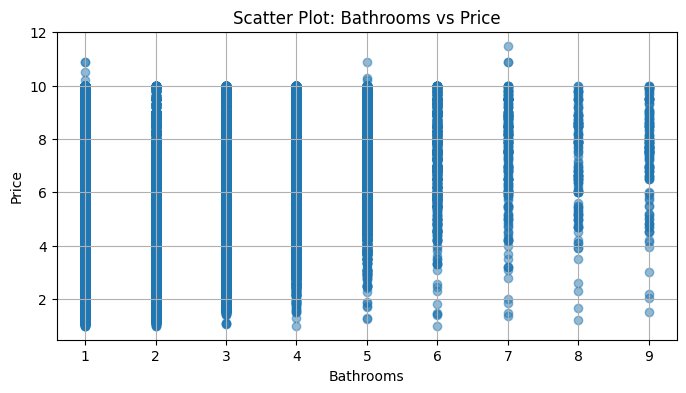

<Figure size 640x480 with 0 Axes>

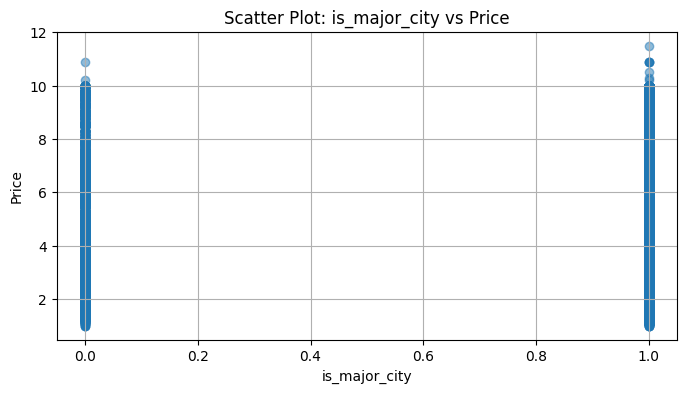

<Figure size 640x480 with 0 Axes>

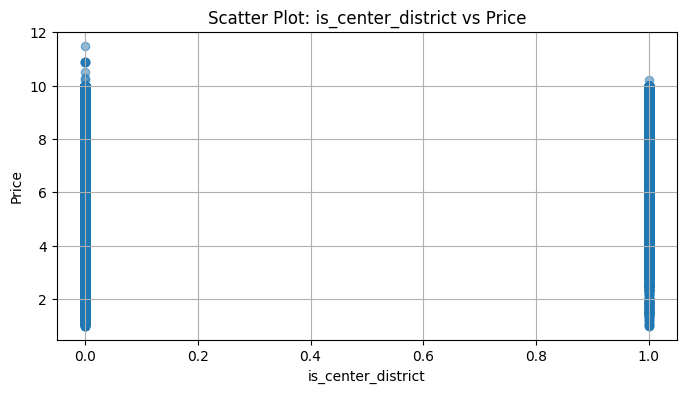

<Figure size 640x480 with 0 Axes>

In [ ]:
# List of numerical features to plot against 'Price'
numerical_features = house_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(house_data[feature], house_data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()
    plt.savefig(f'Scatter Plot: {feature} vs Price.png', dpi=300, bbox_inches='tight')

Ch√∫ng ta c√≥ th·ªÉ th·∫•y m·ªôt s·ªë gi√° tr·ªã Outlier, c√°c gi√° tr·ªã n√†y s·∫Ω g√¢y ·∫£nh h∆∞·ªõng ƒë·∫øn qu√° tr√¨nh hu·∫•n luy·ªán c·ªßa m√¥ h√¨nh do ch√∫ng s·∫Ω g√¢y l·ªách gi√° tr·ªã (bias) hay l√† s·∫Ω g√¢y overfitting khi·∫øn m√¥ m·∫•t ƒëi ƒë·ªô chu·∫©n x√°c.

# Sau ƒë√¢y l√† b∆∞·ªõc lo·∫°i b·ªè c√°c Outlier c√≥ trong d·ªØ li·ªáu:
# T√≥m t·∫Øt
üìå M·ª•c ƒë√≠ch: Lo·∫°i b·ªè outlier b·∫±ng ph∆∞∆°ng ph√°p IQR (Interquartile Range).
üìå C√°ch th·ª±c hi·ªán:

1. X√°c ƒë·ªãnh c√°c c·ªôt s·ªë.
2. T√≠nh Q1, Q3, IQR c·ªßa t·ª´ng c·ªôt.
3. Lo·∫°i b·ªè d·ªØ li·ªáu n·∫±m ngo√†i ph·∫°m vi [Q1 - 1.5*IQR, Q3 + 1.5*IQR].
4. Reset l·∫°i index sau khi l·ªçc.
    
    üìå L·ª£i √≠ch: Gi√∫p m√¥ h√¨nh tr√°nh b·ªã ·∫£nh h∆∞·ªüng b·ªüi c√°c gi√° tr·ªã ngo·∫°i lai qu√° l·ªõn ho·∫∑c qu√° nh·ªè.

1. Hi·ªÉu v·ªÅ T·ª© ph√¢n v·ªã (Quartiles) v√† IQR
T·ª© ph√¢n v·ªã (Quartiles)
D·ªØ li·ªáu ƒë∆∞·ª£c chia th√†nh 4 ph·∫ßn b·∫±ng nhau, ƒë∆∞·ª£c x√°c ƒë·ªãnh b·ªüi c√°c ƒëi·ªÉm t·ª© ph√¢n v·ªã:

Q1 (Quartile 1 - Ph√¢n v·ªã th·ª© 25%): Gi√° tr·ªã m√† 25% d·ªØ li·ªáu nh·ªè h∆°n ho·∫∑c b·∫±ng.
Q2 (Quartile 2 - Ph√¢n v·ªã th·ª© 50%): Trung v·ªã (Median) ‚Äì chia d·ªØ li·ªáu th√†nh hai n·ª≠a.
Q3 (Quartile 3 - Ph√¢n v·ªã th·ª© 75%): Gi√° tr·ªã m√† 75% d·ªØ li·ªáu nh·ªè h∆°n ho·∫∑c b·∫±ng.
V√≠ d·ª•: D·ªØ li·ªáu s·∫Øp x·∫øp tƒÉng d·∫ßn
üëâ [2, 4, 6, 8, 10, 12, 14, 16, 18]

Q1 = 6 (25% ƒë·∫ßu ti√™n)
Q2 = 10 (50%)
Q3 = 14 (75%)
IQR = Q3 - Q1 = 14 - 6 = 8

In [ ]:
print(f"Before filtering: {house_data.shape}")

numerical_cols = house_data.select_dtypes(include=[np.number]).columns
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

for column in numerical_cols:
  if column not in ['is_major_city',	'is_center_district']:
    house_data = remove_outlier_IQR(house_data, column)

house_data.reset_index(inplace = True)
print(f"After filtering: {house_data.shape}")

Before filtering: (30229, 17)
After filtering: (26744, 18)


In [ ]:
house_data[numerical_cols].corr()

Area  Frontage  Access Road    Floors  Bedrooms  Bathrooms     Price  is_major_city  is_center_district
Area                1.000000  0.189496     0.267829 -0.394507  0.001050  -0.022317  0.172215      -0.299459           -0.264278
Frontage            0.189496  1.000000     0.363097 -0.020932  0.092645   0.122218  0.040640      -0.075951           -0.066742
Access Road         0.267829  0.363097     1.000000 -0.092357  0.123194   0.161585  0.045785      -0.114046           -0.157431
Floors             -0.394507 -0.020932    -0.092357  1.000000  0.439737   0.468646  0.296172       0.134757            0.205818
Bedrooms            0.001050  0.092645     0.123194  0.439737  1.000000   0.734037  0.208905       0.071859            0.042466
Bathrooms          -0.022317  0.122218     0.161585  0.468646  0.734037   1.000000  0.219703       0.095928            0.014772
Price               0.172215  0.040640     0.045785  0.296172  0.208905   0.219703  1.000000       0.141400            0.142008
is_major_city      -0.299459 -0.075951    -0.114046  0.134757  0.071859   0.095928  0.141400       1.000000            0.136998
is_center_district -0.264278 -0.066742    -0.157431  0.205818  0.042466   0.014772  0.142008       0.136998            1.000000

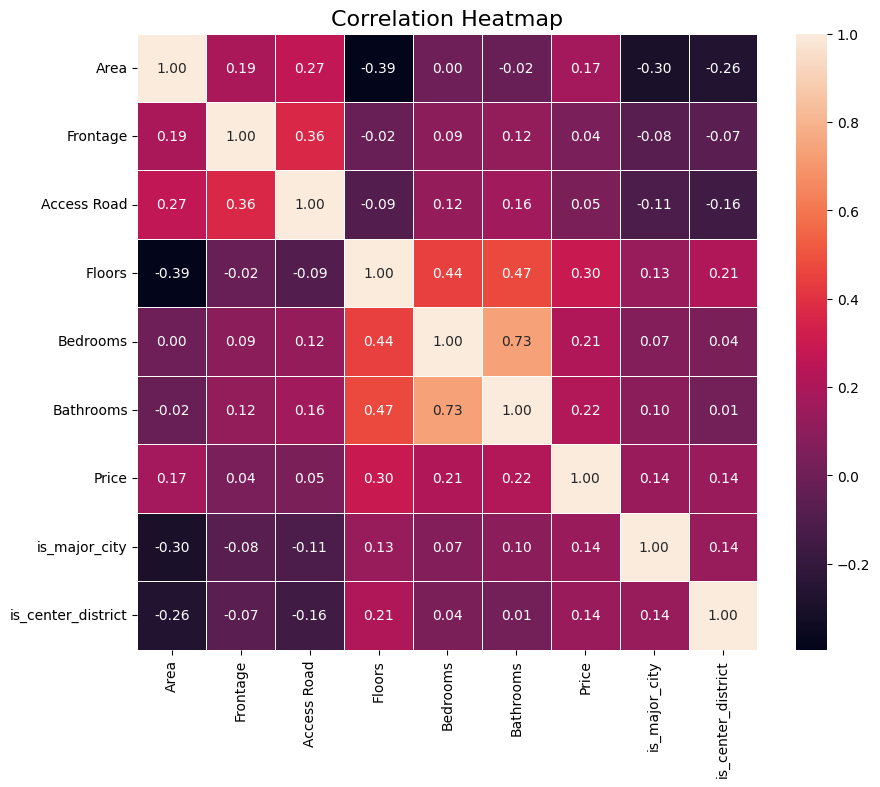

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_matrix = house_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()
plt.savefig('Correlation_Heatmap.png', dpi=300, bbox_inches='tight')

Floors, Bedrooms v√† Bathrooms c√≥ m·ªëi t∆∞∆°ng quan cao nh·∫•t v·ªõi bi·∫øn m·ª•c ti√™u c≈©ng nh∆∞ v·ªõi nhau, ƒëi·ªÅu n√†y s·∫Ω h·ªØu √≠ch cho qu√° tr√¨nh t·∫°o ƒë·∫∑c tr∆∞ng (Feature Engineering) sau n√†y. ƒêi·ªÅu khi·∫øn t√¥i ng·∫°c nhi√™n l√† m·ªëi t∆∞∆°ng quan gi·ªØa gi√° nh√† v√† di·ªán t√≠ch (th∆∞·ªùng l√† y·∫øu t·ªë quy·∫øt ƒë·ªãnh gi√° nh√†). Tuy nhi√™n, v√¨ ch√∫ng ta ch·ªâ ƒëang xem x√©t m·ªëi t∆∞∆°ng quan tuy·∫øn t√≠nh, n√™n c√≥ th·ªÉ ch√∫ng ta ƒë√£ b·ªè l·ª° m·ªôt s·ªë ki·ªÉu quan h·ªá kh√°c. Do ƒë√≥, ch√∫ng ta c√≥ th·ªÉ s·ª≠ d·ª•ng Mutual Information ƒë·ªÉ ki·ªÉm tra th√™m.

In [ ]:
# I only want to check Mutual Information of only numerical features
X = house_data[numerical_cols]
y = X.pop('Price')



Area c√≥ nhi·ªÅu MI nh·∫•t ·ªü ƒë√¢y. D√π sao th√¨, b∆∞·ªõc n√†y ch·ªâ ƒë·ªÉ minh h·ªça. V√¨ ch√∫ng ta ch·ªâ c√≥ m·ªôt v√†i ƒë·∫∑c tr∆∞ng, n√™n t√¥i nghƒ© t·ªët nh·∫•t l√† gi·ªØ l·∫°i t·∫•t c·∫£ cho m√¥ h√¨nh sau n√†y. N·∫øu c√≥ nhi·ªÅu ƒë·∫∑c tr∆∞ng, ch√∫ng ta c√≥ th·ªÉ ki·ªÉm tra m·ªëi t∆∞∆°ng quan v√† Th√¥ng tin T∆∞∆°ng h·ªó (Mutual Information) c·ªßa ch√∫ng ƒë·ªÉ x√°c ƒë·ªãnh ƒë·∫∑c tr∆∞ng n√†o ƒë√°ng gi·ªØ l·∫°i v√† ƒë·∫∑c tr∆∞ng n√†o kh√¥ng, nh·∫±m ti·∫øt ki·ªám t√†i nguy√™n v√† th·ªùi gian.

m√£ MI kh√¥ng ph·∫£i v√¥ √≠ch, b√¢y gi·ªù t√¥i mu·ªën t·∫°o c√°c PCA v√† ki·ªÉm tra MI c·ªßa ch√∫ng ƒë·ªÉ xem n√™n gi·ªØ l·∫°i nh·ªØng g√¨.

Nh∆∞ ph√¢n t√≠ch c√°c th√¥ng s·ªë v·ªÅ PCA v√† MI score ƒë·ªÅ cao ·ªü c√°c tr∆∞·ªùng Floors, Bedrooms, Bathrooms, and Area v√¨ v·∫≠y ch√∫ng c√≥ s·ª± t∆∞∆°ng quan v·ªõi nhau.

# T·∫°o Feature c√≥ c√°c tr∆∞·ªùng Floors, Bedrooms, Bathrooms, Area, is_major_city	v√† is_center_district

In [ ]:
#  t·∫°o ra c√°c ƒë·∫∑c tr∆∞ng (features) m·ªõi d·ª±a tr√™n loadings c·ªßa PCA.
X['Total Room'] = X['Bedrooms'] + X['Bathrooms']
X['Total Room + Floor'] = X['Total Room'] + X['Floors']
X['Bedrooms * Area'] = X['Bedrooms'] * X['Area']
X['Bathrooms * Area'] = X['Bathrooms'] * X['Area']
X['Area_Floors'] = X['Area'] * X['Floors']
X['High_Values Real Estate'] = X['is_major_city'] * X["is_center_district"]

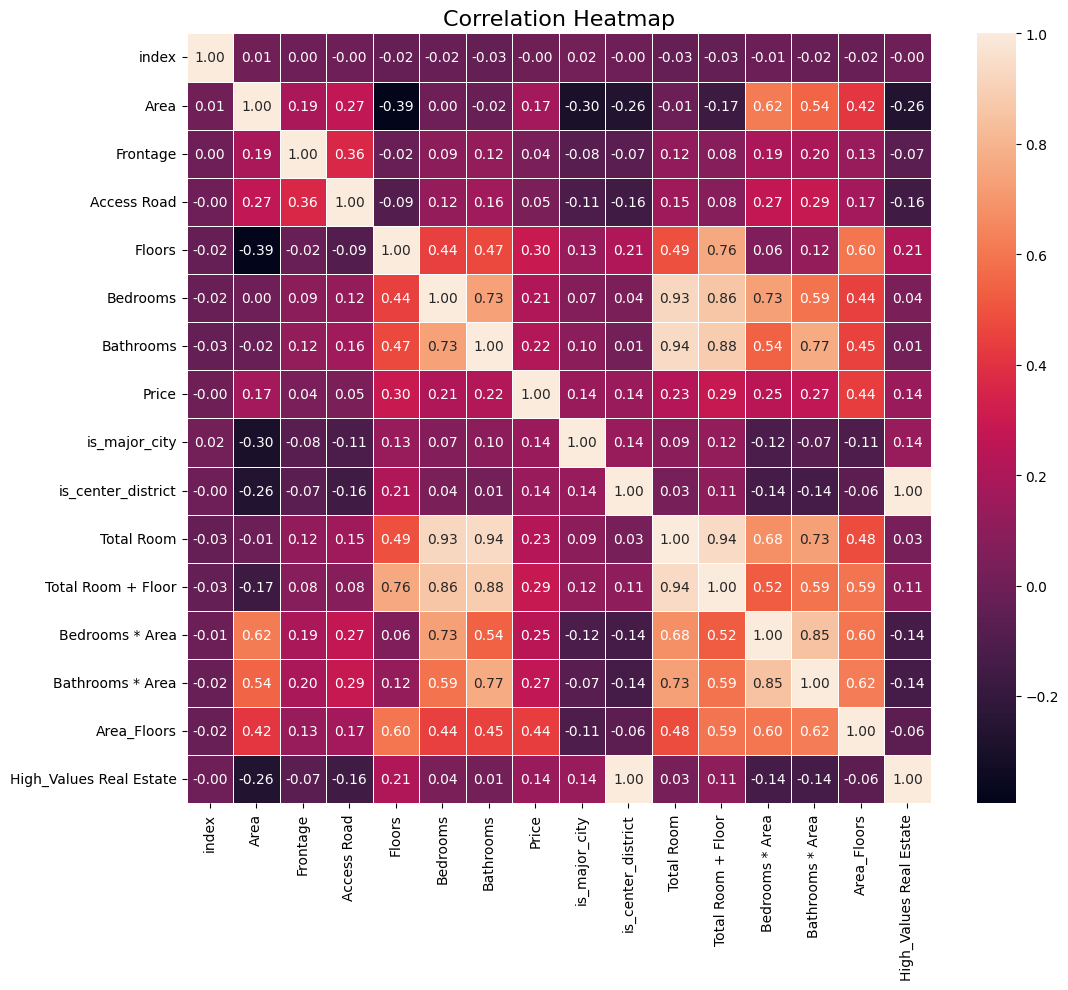

<Figure size 640x480 with 0 Axes>

In [ ]:
# v·∫Ω ƒë·ªì th·ªã bi·ªÉu hi·ªán s·ª± t∆∞∆°ng quan c·ªßa c√°c gi√° tr·ªã v·ªõi nhau
house_data = house_data.assign(**X)
numerical_features = house_data.select_dtypes(include=['number']).columns
corr_matrix = house_data[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()
plt.savefig('CorrelationHeatmap_with_PC.png', dpi=300, bbox_inches='tight')

## Categorical Features

In [ ]:
# Check null values
house_data.isnull().sum()

index                          0
Address                        0
Area                           0
Frontage                       0
Access Road                    0
House direction            19449
Balcony direction          22639
Floors                         0
Bedrooms                       0
Bathrooms                      0
Legal status                3958
Furniture state            12152
Price                          0
province_cleaned               0
is_major_city                  0
major_city_name                0
is_center_district             0
region                         0
Total Room                     0
Total Room + Floor             0
Bedrooms * Area                0
Bathrooms * Area               0
Area_Floors                    0
High_Values Real Estate        0
dtype: int64

L·∫Øp ƒë·∫ßy c√°c gi√° tr·ªã tr·ªëng c√°c Tr∆∞·ªùng Legal status v√† Furniture state v·ªõi gi√° tr·ªã None n·∫øu tr·ªëng

In [ ]:
house_data['Legal status'].fillna('None', inplace=True)
house_data['Furniture state'].fillna('None', inplace=True)

Sau khi ph√¢n t√≠ch ta c√≥ th·ªÉ th·∫•y r·∫±ng c√°c tr∆∞·ªùng li√™n quan ƒë·∫øn H∆∞·ªõng c·ªßa nh√†, ban c√¥ng kh√¥ng ƒë√≥ng g√≥p qu√° nhi·ªÅu v√†o trong qu√° tr√¨nh ƒë∆∞a ra gi√° nh√†, ngo√†i ra hai tr∆∞·ªùng n√†y c√≤n b·ªã b·ªè tr·ªëng ƒë·∫øn g·∫ßn 2/3 s·ªë d·ªØ li·ªáu.

In [ ]:
house_data.drop('House direction', inplace = True, axis = 1)
house_data.drop('Balcony direction', inplace = True, axis = 1)

Trong Tr∆∞·ªùng Address (ƒë·ªãa ch·ªâ) c√≥ 2 y·∫øu t·ªë m√† ch√∫ng ta c√≥ th·ªÉ d√πng:
1. Th√†nh ph·ªë n∆°i m√† cƒÉn nh√† n·∫±m ·ªü
2. N·∫øu cƒÉn nh√† c√≥ n·∫±m trong khi v·ª±c d·ª± √°n hay kh√¥ng.

T·ª´ hai ƒëi·ªÅu n√†y ch√∫ng ta c√≥ th·ªÉ gi√∫p c·∫£i thi·ªán k·∫øt qu·∫£ ƒë·∫ßu ra c·ªßa m√¥ h√¨nh.

In [ ]:
# house_data['Province'] = house_data['Address'].str.split(", ").str[-1].str.replace(".", "")
house_data['Project'] = house_data['Address'].str.lower().str.contains('d·ª± √°n').map({True: 1, False: 0})

# house_data.head()

In [ ]:
# S·∫Ω lo·∫°i b·ªè c√°c khu v·ª±c xu·∫•t hi·ªán √≠t h∆°n 5 l·∫ßn trong to√†n b·ªô dataset ƒë·ªÉ h·∫°n ch·∫ø ƒë·ªô nhi·ªÖu (noise) trong qu√° tr√¨nh hu·∫•n luy·ªán
unique_provinces = house_data['province_cleaned'].value_counts()
unique_provinces = unique_provinces[unique_provinces < 5].index
house_data = house_data[~house_data['province_cleaned'].isin(unique_provinces)]

house_data.drop('Address', axis = 1, inplace = True)

Ki·ªÉm tra gi·∫£ thuy·∫øt v·ªÅ s·ª± t∆∞∆°ng quan gi·ªØa gi√° c·∫£ v√† ƒë·ªãa ch·ªâ.

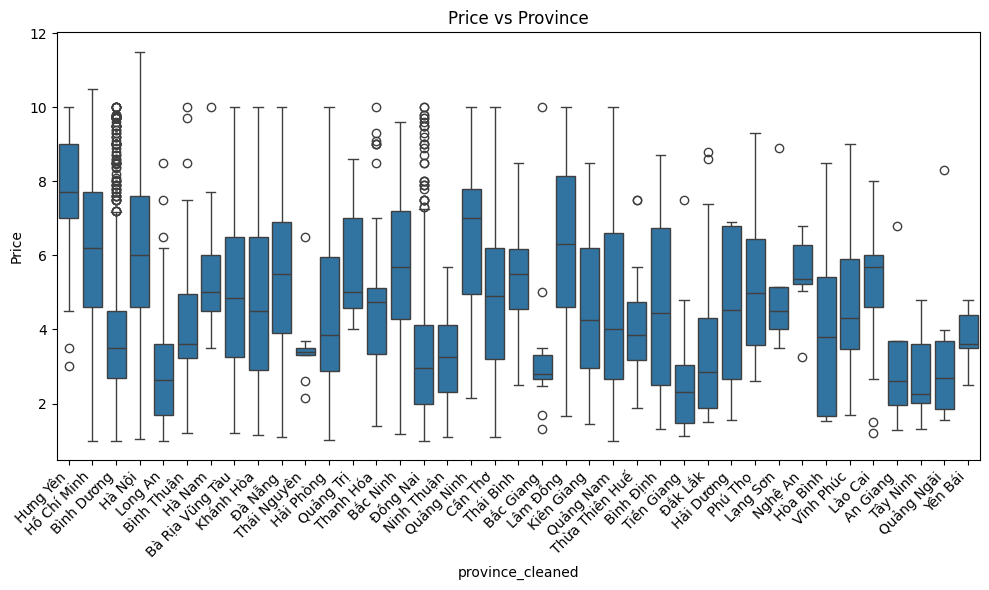

In [ ]:
# T·∫°o bi·ªÉu ƒë·ªÉ hi·ªán th·ªã s·ª± t∆∞∆°ng quan c·ªßa Price v√† Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='province_cleaned', y='Price', data=house_data)
plt.title('Price vs Province')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

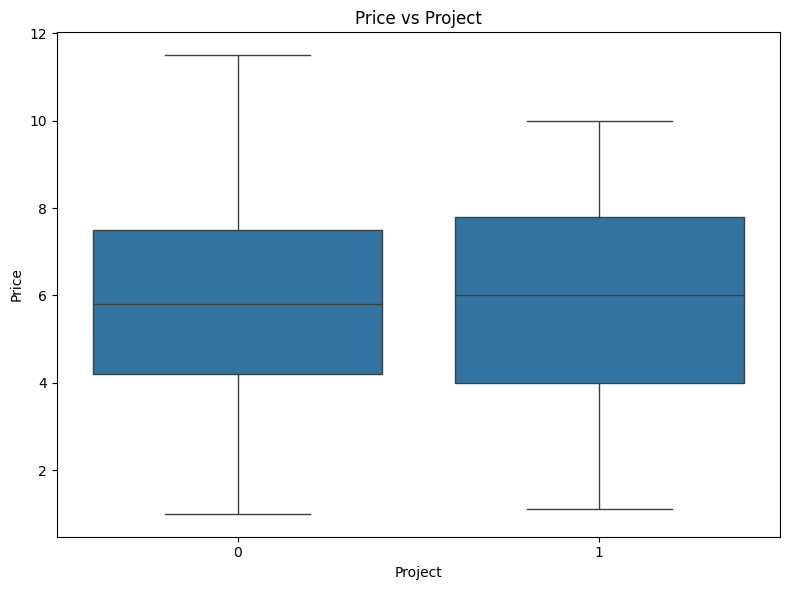

<Figure size 640x480 with 0 Axes>

In [ ]:
# L√†m t∆∞∆°ng t·ª± cho c·ªôt D·ª± √°n (Project) v√† Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Project', y='Price', data=house_data)
plt.title('Price vs Project')

plt.tight_layout()
plt.show()
plt.savefig('Project_Price.png', dpi=300, bbox_inches='tight')

# K·∫øt lu·∫≠n:
sau khi ƒë√£ tr·ª±c quan h√≥a d·ªØ li·ªáu ta c√≥ th·ªÉ th·∫•y r·∫±ng, th√†nh ph·ªë m√† cƒÉn nh√† ƒë∆∞·ª£c ƒë·∫∑t t·∫°i c√≥ s·ª©c ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° c·∫£ c·ªßa cƒÉn nh√†, trong khi ƒë√≥ vi·ªác cƒÉn nh√† c√≥ thu·ªôc d·ª± √°n hay kh√¥ng kh√¥ng c√≥ qu√° nhi·ªÅu ·∫£nh h∆∞·ªüng ƒë·ªÉ quy·∫øt ƒë·ªãnh,

Ti·∫øp theo s·∫Ω t√≠nh to√°n m·ªôt s·ªë ƒë·∫∑c tr∆∞ng m·ªõi v√† lo·∫°i b·ªè c√°c ƒë·∫∑c tr∆∞ng kh√¥ng c·∫ßn thi·∫øt ra kh·ªèi Dataset

1. T·∫°o th√™m m·ªôt tr∆∞·ªùng c√≥ t√™n "Price per square" nh·∫±m gi√∫p ch√∫ng ta c√≥ th·ªÉ bi·∫øt ƒë∆∞·ª£c gi√° ti·ªÅn tr√™n 1 m√©t vu√¥ng c·ªßa c√°c cƒÉn nh√† c·ªßa dataset

1.1 T·∫°o c·ªôt m·ªõi Price per square b·∫±ng c√°ch l·∫•y gi√° nh√† (Price) chia cho di·ªán t√≠ch (Area)

1.2 L·ªçc b·ªè c√°c b·∫•t ƒë·ªông s·∫£n c√≥ gi√° qu√° th·∫•p (Gi·ªØ l·∫°i c√°c b·∫•t ƒë·ªông s·∫£n c√≥ gi√° tr√™n m·ªói m√©t vu√¥ng nh·ªè h∆°n ho·∫∑c b·∫±ng 0.25) l√Ω do: ƒë·ªÉ h·∫°n ch·∫ø c√°c outlier v√† c√°c cƒÉn nh√† b·ªã ƒë·ªÉ sai gi√°.

1.3 T·∫°o ƒë·∫∑c tr∆∞ng t·ªï h·ª£p t·ª´ t·ªânh th√†nh v√† d·ª± √°n t·∫°o m·ªôt ƒë·∫∑c tr∆∞ng m·ªõi Province_Project b·∫±ng c√°ch k·∫øt h·ª£p Province v√† Project, gi√∫p ph√¢n nh√≥m d·ªØ li·ªáu theo t·ª´ng d·ª± √°n trong m·ªói t·ªânh

1.4 T√≠nh gi√° trung b√¨nh tr√™n m·ªói m√©t vu√¥ng theo nh√≥m Province_Project nh√≥m d·ªØ li·ªáu theo Province_Project, sau ƒë√≥ t√≠nh gi√° trung b√¨nh tr√™n m·ªói m√©t vu√¥ng c·ªßa t·ª´ng nh√≥m v√† g√°n v√†o c·ªôt AveragePricePerSquare

1.5 Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt:
 + X√≥a c·ªôt Price per square (ƒë√£ ƒë∆∞·ª£c thay th·∫ø b·ªüi AveragePricePerSquare).
 + X√≥a c·ªôt Province v√† Project v√¨ ƒë√£ k·∫øt h·ª£p th√†nh Province_Project.

In [ ]:
house_data['Price per square'] = house_data['Price'] / house_data['Area']
house_data = house_data[house_data['Price per square'] <= 0.25]

house_data['Province_Project'] = house_data['province_cleaned'] + '_' + house_data['Project'].astype(str)

house_data["AveragePricePerSquare"] = (
    house_data.groupby("Province_Project")
    ["Price per square"]
    .transform("mean")
)
print(house_data.columns)
house_data.drop('Price per square', axis = 1, inplace = True)
house_data.drop('province_cleaned', axis = 1, inplace = True)
house_data.drop('Project', axis = 1, inplace = True)

Index(['index', 'Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Legal status', 'Furniture state', 'Price', 'province_cleaned', 'is_major_city', 'major_city_name', 'is_center_district', 'region', 'Total Room', 'Total Room + Floor', 'Bedrooms * Area', 'Bathrooms * Area', 'Area_Floors', 'High_Values Real Estate', 'Project', 'Price per square', 'Province_Project', 'AveragePricePerSquare'], dtype='object')


In [ ]:
house_data["region"].unique()

array(['North', 'South', 'Central', 'Other'], dtype=object)

In [ ]:
def prepare_training_data(df):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split
    import joblib

    # M·ª•c ti√™u
    y = df['Price']

    # C√°c c·ªôt kh√¥ng d√πng ƒë·ªÉ hu·∫•n luy·ªán
    drop_cols = ['index', 'Price', 'major_city_name', 'Province_Project']
    df_model = df.drop(columns=drop_cols)

    # X√°c ƒë·ªãnh c·ªôt d·∫°ng s·ªë v√† d·∫°ng ph√¢n lo·∫°i
    numerical_cols = df_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()

    # Ti·ªÅn x·ª≠ l√Ω
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Fit ƒë·ªÉ l·∫•y t√™n c√°c feature
    preprocessor.fit(df_model)

    # L∆∞u feature list
    transformed_feature_names = preprocessor.get_feature_names_out()
    joblib.dump(list(transformed_feature_names), '/content/drive/MyDrive/DoAnTotNghiep/test/final_feature_list.pkl')

    # Bi·∫øn ƒë·ªïi d·ªØ li·ªáu
    X_processed = preprocessor.transform(df_model)

    # Chia t·∫≠p train/test
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    joblib.dump(preprocessor, '/content/drive/MyDrive/DoAnTotNghiep/test/preprocessor.pkl')

    return X_train, X_test, y_train, y_test, preprocessor


Chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán (75%) v√† t·∫≠p ki·ªÉm tra (20%) v√† t·∫≠p ƒë√°nh gi√° (5%).


X√°c ƒë·ªãnh danh s√°ch gi√° tr·ªã alpha c·∫ßn th·ª≠ nghi·ªám.

Hu·∫•n luy·ªán m√¥ h√¨nh Ridge v·ªõi GridSearchCV ƒë·ªÉ t√¨m gi√° tr·ªã alpha t·ªëi ∆∞u.

Hu·∫•n luy·ªán m√¥ h√¨nh Lasso v·ªõi GridSearchCV ƒë·ªÉ t√¨m gi√° tr·ªã alpha t·ªëi ∆∞u.

D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra b·∫±ng m√¥ h√¨nh Ridge v√† Lasso t·ªët nh·∫•t.

T√≠nh to√°n RMSE ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t m√¥ h√¨nh.

In k·∫øt qu·∫£ g·ªìm gi√° tr·ªã alpha t·ªëi ∆∞u v√† RMSE cho c·∫£ hai m√¥ h√¨nh.

## L√Ω do s·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m gi√° tr·ªã Œ± t·ªëi ∆∞u trong Ridge v√† Lasso:

+ Ridge v√† Lasso ƒë·ªÅu c√≥ si√™u tham s·ªë Œ± (regularization strength):

    + Œ± ƒëi·ªÅu ch·ªânh m·ª©c ƒë·ªô ph·∫°t l√™n c√°c h·ªá s·ªë h·ªìi quy, ·∫£nh h∆∞·ªüng ƒë·∫øn ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh.
    + Ch·ªçn Œ± ph√π h·ª£p gi√∫p c√¢n b·∫±ng gi·ªØa ƒë·ªô ch√≠nh x√°c v√† kh·∫£ nƒÉng t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh.
+ GridSearchCV t·ª± ƒë·ªông th·ª≠ nghi·ªám nhi·ªÅu gi√° tr·ªã Œ±:

+ Ki·ªÉm tra hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán b·∫±ng c√°ch s·ª≠ d·ª•ng cross-validation.
+ Ch·ªçn ra gi√° tr·ªã Œ± t·ªëi ∆∞u gi√∫p m√¥ h√¨nh gi·∫£m qu√° kh·ªõp (overfitting) ho·∫∑c gi·∫£m ƒë·ªô l·ªách (bias).
+ So s√°nh hi·ªáu su·∫•t c·ªßa Ridge v√† Lasso:

+ Ridge gi√∫p gi·∫£m overfitting b·∫±ng c√°ch co nh·ªè c√°c h·ªá s·ªë nh∆∞ng kh√¥ng ƒë∆∞a v·ªÅ 0.
+ Lasso c√≥ th·ªÉ l√†m m·ªôt s·ªë h·ªá s·ªë b·∫±ng 0, gi√∫p ch·ªçn l·ªçc ƒë·∫∑c tr∆∞ng.
+ T√¨m gi√° tr·ªã Œ± t·ªëi ∆∞u gi√∫p x√°c ƒë·ªãnh m√¥ h√¨nh n√†o ph√π h·ª£p h∆°n v·ªõi d·ªØ li·ªáu.

In [ ]:
X_train, X_test, y_train, y_test, preprocessor = prepare_training_data(house_data)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Area', 'Frontage', 'Access Road', 'Floors',
                                  'Bedrooms', 'Bathrooms', 'is_major_city',
                                  'is_center_district', 'Total Room',
                                  'Total Room + Floor', 'Bedrooms * Area',
                                  'Bathrooms * Area', 'Area_Floors',
                                  'High_Values Real Estate',
                                  'AveragePricePerSquare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Legal status', 'Furniture state',
                                  'region'])])

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Hu·∫•n luy·ªán ho·∫∑c t·∫£i l·∫°i Ridge & Lasso
ridge_model_path = os.path.join(save_dir, "ridge_model.pkl")
lasso_model_path = os.path.join(save_dir, "lasso_model.pkl")

# if os.path.exists(ridge_model_path) and os.path.exists(lasso_model_path):
#     ridge_best = joblib.load(ridge_model_path)
#     lasso_best = joblib.load(lasso_model_path)
# else:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_
joblib.dump(ridge_best, ridge_model_path)

lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_
joblib.dump(lasso_best, lasso_model_path)

# Make predictions on the testing set using the best models
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# Calculate RMSE for Ridge and Lasso
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

# Output the RMSE values and best alpha values
print(f"Ridge Regression - Best Alpha: {ridge_cv.best_params_['alpha']}, RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression - Best Alpha: {lasso_cv.best_params_['alpha']}, RMSE: {lasso_rmse:.2f}")

Ridge Regression - Best Alpha: 10, RMSE: 1.72
Lasso Regression - Best Alpha: 0.01, RMSE: 1.72


In [ ]:
# Ki·ªÉm tra v√† t·∫£i m√¥ h√¨nh
if os.path.exists(ridge_model_path) and os.path.exists(lasso_model_path):
    ridge_best = joblib.load(ridge_model_path)
    lasso_best = joblib.load(lasso_model_path)

    # D·ª± ƒëo√°n tr√™n t·∫≠p test
    ridge_pred = ridge_best.predict(X_test)
    lasso_pred = lasso_best.predict(X_test)

    # T√≠nh MAPE
    ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
    lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)

    # T√≠nh RMSE
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

    # In k·∫øt qu·∫£
    print(f"Ridge Regression - MAPE: {ridge_mape:.2f}%, RMSE: {ridge_rmse:.2f}")
    print(f"Lasso Regression - MAPE: {lasso_mape:.2f}%, RMSE: {lasso_rmse:.2f}")
else:
    print("Kh√¥ng t√¨m th·∫•y m√¥ h√¨nh Ridge ho·∫∑c Lasso.")

Ridge Regression - MAPE: 0.30%, RMSE: 1.72
Lasso Regression - MAPE: 0.30%, RMSE: 1.72


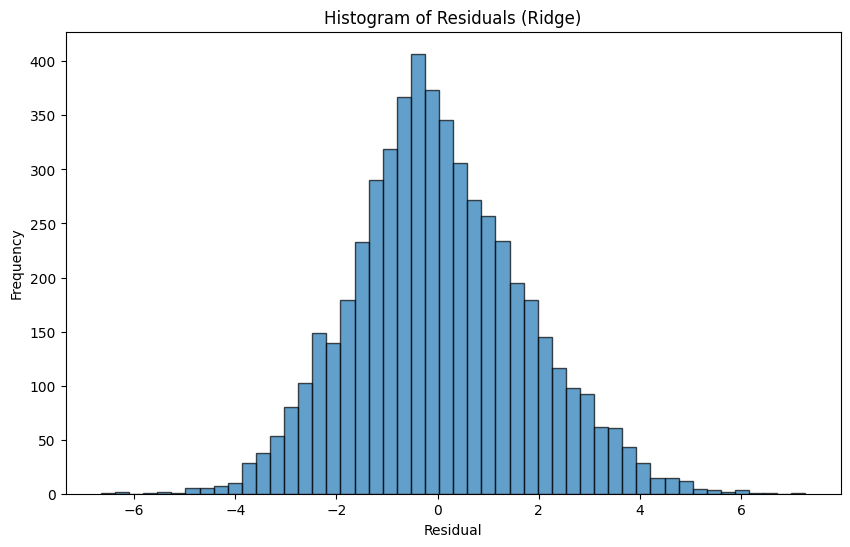

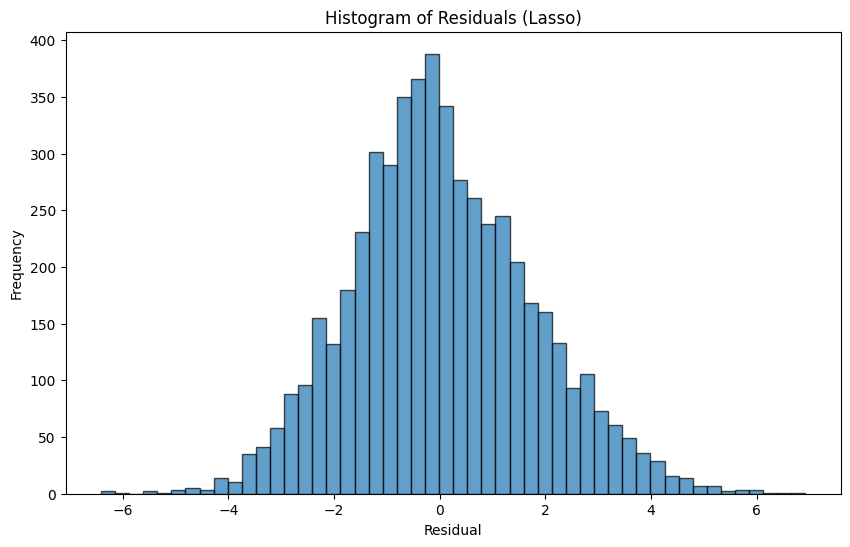

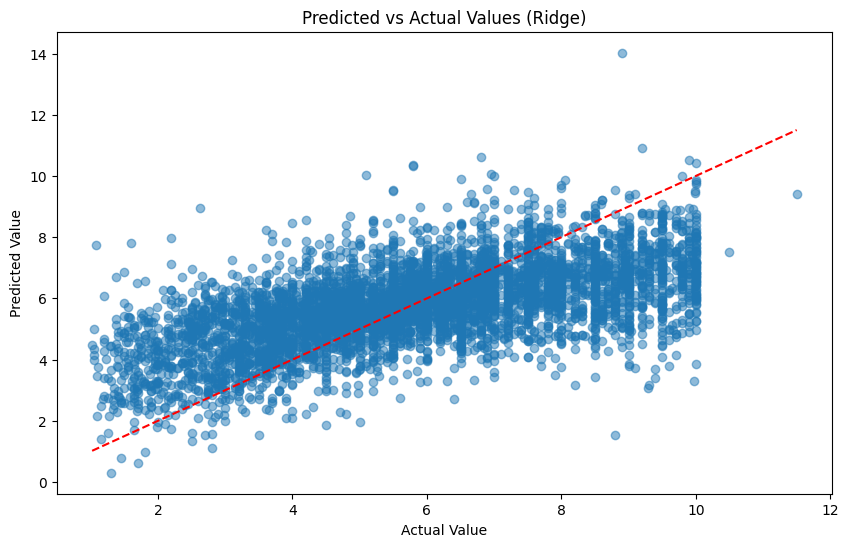

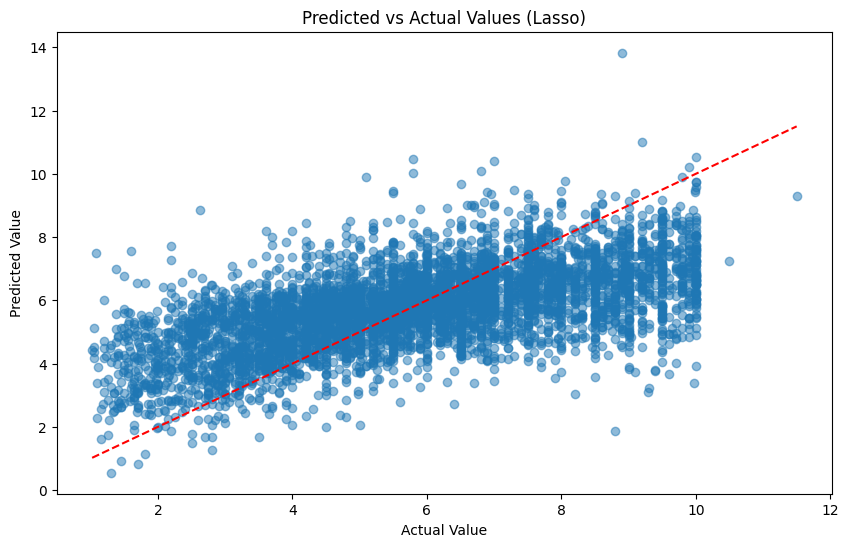

In [ ]:
ridge_best = joblib.load(ridge_model_path)
lasso_best = joblib.load(lasso_model_path)

# Gi·∫£ s·ª≠ X_test v√† y_test ƒë√£ c√≥ (v√¨ user ch∆∞a cung c·∫•p)
# D·ª± ƒëo√°n gi√° tr·ªã v·ªõi Ridge v√† Lasso
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# T√≠nh ph·∫ßn d∆∞ (Residuals)
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

# Plot Histogram of Residuals for Ridge
plt.figure(figsize=(10, 6))
plt.hist(ridge_residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Ridge)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/ridge_residuals.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Histogram of Residuals for Lasso
plt.figure(figsize=(10, 6))
plt.hist(lasso_residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Lasso)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/lasso_residuals.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Predicted vs Actual Values for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values (Ridge)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/ridge_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot Predicted vs Actual Values for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Values (Lasso)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig("/content/drive/MyDrive/DoAnTotNghiep/lasso_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

# T√≥m t·∫Øt v√† Gi·∫£i th√≠ch M√¥ h√¨nh XGBoost
1. C√°ch ho·∫°t ƒë·ªông c·ªßa m√¥ h√¨nh

 + M√¥ h√¨nh XGBoost Regressor ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± ƒëo√°n bi·∫øn m·ª•c ti√™u y_test d·ª±a tr√™n t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán X_train, y_train.

 + XGBoost (Extreme Gradient Boosting) l√† m·ªôt thu·∫≠t to√°n boosting d·ª±a tr√™n c√¢y quy·∫øt ƒë·ªãnh, ho·∫°t ƒë·ªông b·∫±ng c√°ch t·∫°o nhi·ªÅu c√¢y nh·ªè v√† t·ªïng h·ª£p ch√∫ng ƒë·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c d·ª± ƒëo√°n.

2. Gi·∫£i th√≠ch c√°c hyperparameter:

 + objective='reg:squarederror': S·ª≠ d·ª•ng h√†m m·∫•t m√°t MSE (Mean Squared Error) ph√π h·ª£p cho b√†i to√°n h·ªìi quy.

 + random_state=42: ƒê·∫£m b·∫£o t√≠nh t√°i l·∫≠p k·∫øt qu·∫£.

 + colsample_bytree=0.7: Ch·ªâ l·∫•y 70% s·ªë ƒë·∫∑c tr∆∞ng ƒë·ªÉ x√¢y d·ª±ng m·ªói c√¢y, gi√∫p gi·∫£m overfitting.

 + gamma=0.1: ƒêi·ªÅu ch·ªânh ƒë·ªô ph·ª©c t·∫°p c·ªßa c√¢y (tƒÉng gamma gi√∫p c·∫Øt t·ªâa c√¢y m·∫°nh h∆°n).

 + learning_rate=0.01: T·ªëc ƒë·ªô h·ªçc nh·ªè gi√∫p m√¥ h√¨nh h·ªçc ch·∫≠m nh∆∞ng ·ªïn ƒë·ªãnh, gi·∫£m nguy c∆° overfitting.

 + max_depth=7: Gi·ªõi h·∫°n ƒë·ªô s√¢u t·ªëi ƒëa c·ªßa c√¢y, c√¢n b·∫±ng gi·ªØa ƒë·ªô ch√≠nh x√°c v√† overfitting.

 + n_estimators=1000: S·ªë l∆∞·ª£ng c√¢y trong m√¥ h√¨nh, c√†ng l·ªõn th√¨ m√¥ h√¨nh c√†ng ph·ª©c t·∫°p.

 + subsample=0.9: L·∫•y 90% d·ªØ li·ªáu ng·∫´u nhi√™n cho m·ªói v√≤ng l·∫∑p boosting, gi√∫p gi·∫£m overfitting.

3. L√Ω do ch·ªçn XGBoost

 + Hi·ªáu su·∫•t cao: XGBoost t·ªëi ∆∞u h√≥a gradient boosting gi√∫p tƒÉng t·ªëc ƒë·ªô hu·∫•n luy·ªán v√† d·ª± ƒëo√°n nhanh h∆°n.

 + Ch·ªëng overfitting t·ªët: Nh·ªù c√°c tham s·ªë nh∆∞ subsample, colsample_bytree, gamma v√† learning_rate.

 + Kh·∫£ nƒÉng t·ªïng qu√°t h√≥a m·∫°nh: ƒêi·ªÅu ch·ªânh ƒë∆∞·ª£c m·ª©c ƒë·ªô ph·ª©c t·∫°p c·ªßa m√¥ h√¨nh ƒë·ªÉ tr√°nh h·ªçc qu√° s√°t d·ªØ li·ªáu hu·∫•n luy·ªán.

 + H·ªó tr·ª£ tuning hyperparameter t·ªët: C√≥ th·ªÉ k·∫øt h·ª£p v·ªõi GridSearchCV ƒë·ªÉ t·ªëi ∆∞u th√™m hi·ªáu su·∫•t.

In [ ]:
xgb_model_path = os.path.join(save_dir, "xgb_model.pkl")
# if os.path.exists(xgb_model_path):
#     xgb_model = joblib.load(xgb_model_path)
# else:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    colsample_bytree=0.7,
    gamma=0.1,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=1000,
    subsample=0.9
)
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, xgb_model_path)

xgb_model.fit(X_train, y_train, verbose=True)
y_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {xgb_rmse:.2f}")

RMSE: 1.42


In [ ]:
xgb_mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {xgb_mape * 100:.2f}%")

MAPE: 23.22%


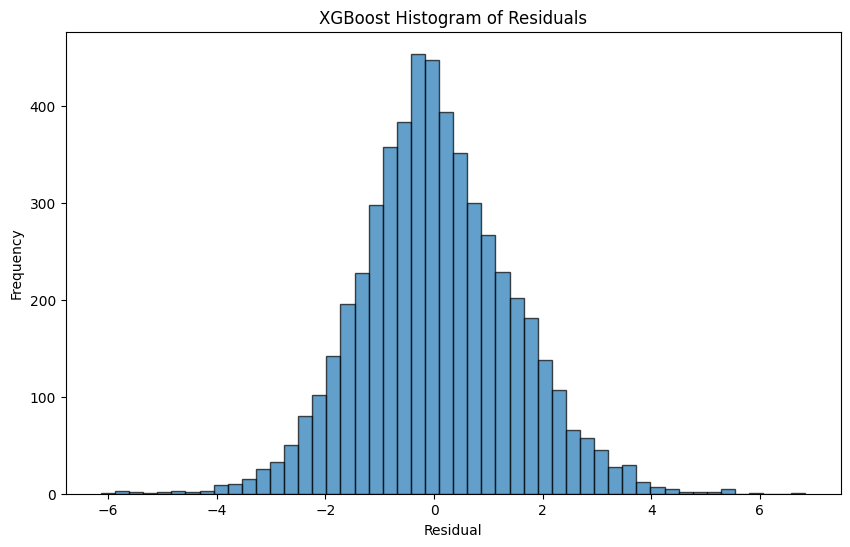

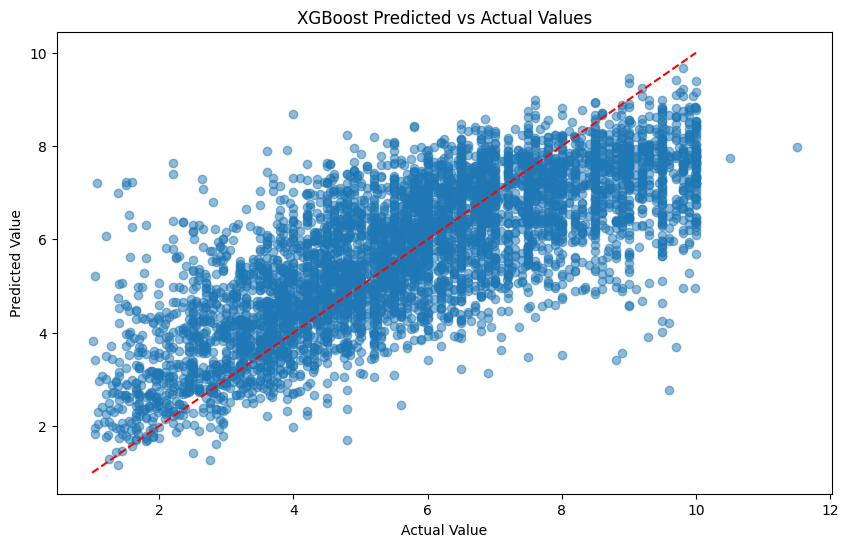

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('XGBoost Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/XGBoost_residuals.png', dpi=300, bbox_inches='tight')
plt.show()



# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([1, 10], [1, 10], 'r--')  # Diagonal line for reference
plt.title('XGBoost Predicted vs Actual Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/XGBoost_predictions.png', dpi=300, bbox_inches='tight')
plt.show()


# Nh·∫≠n x√©t v·ªÅ k·∫øt qu·∫£ bi·ªÉu ƒë·ªì:
1. Histogram c·ªßa ph·∫ßn d∆∞ (Residuals Histogram):

+ Ph√¢n ph·ªëi ph·∫ßn d∆∞ c√≥ d·∫°ng x·∫•p x·ªâ chu·∫©n, t·∫≠p trung quanh gi√° tr·ªã 0.
+ Kh√¥ng c√≥ d·∫•u hi·ªáu r√µ r√†ng c·ªßa s·ª± l·ªách nhi·ªÅu v·ªÅ m·ªôt ph√≠a, ƒëi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh kh√¥ng c√≥ xu h∆∞·ªõng thi√™n l·ªách l·ªõn.
+ Tuy nhi√™n, v·∫´n c√≥ m·ªôt s·ªë ngo·∫°i l·ªá ·ªü hai ph√≠a, c√≥ th·ªÉ l√† c√°c outliers ho·∫∑c m√¥ h√¨nh ch∆∞a x·ª≠ l√Ω t·ªët m·ªôt s·ªë tr∆∞·ªùng h·ª£p ƒë·∫∑c bi·ªát.

2. Bi·ªÉu ƒë·ªì Gi√° tr·ªã D·ª± ƒëo√°n vs. Gi√° tr·ªã Th·ª±c t·∫ø (Predicted vs. Actual Values):

+ C√°c ƒëi·ªÉm d·ªØ li·ªáu ph√¢n b·ªë theo xu h∆∞·ªõng ƒë∆∞·ªùng ch√©o (ƒë∆∞·ªùng m√†u ƒë·ªè), cho th·∫•y m√¥ h√¨nh c√≥ kh·∫£ nƒÉng d·ª± ƒëo√°n t∆∞∆°ng ƒë·ªëi ch√≠nh x√°c.
+ Tuy nhi√™n, c√≥ m·ªôt s·ªë ƒëi·ªÉm n·∫±m xa ƒë∆∞·ªùng ch√©o, cho th·∫•y m√¥ h√¨nh v·∫´n c√≥ l·ªói d·ª± ƒëo√°n ƒë√°ng k·ªÉ trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p.

## K·∫øt lu·∫≠n:
+ M√¥ h√¨nh c√≥ ƒë·ªô ch√≠nh x√°c t∆∞∆°ng ƒë·ªëi t·ªët nh∆∞ng v·∫´n c√≥ m·ªôt s·ªë sai s·ªë.
+ C·∫ßn ki·ªÉm tra th√™m li·ªáu c√≥ th·ªÉ c·∫£i thi·ªán m√¥ h√¨nh b·∫±ng c√°ch ƒëi·ªÅu ch·ªânh si√™u tham s·ªë ho·∫∑c th·ª≠ c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω outlier t·ªët h∆°n.
+ C√≥ th·ªÉ ki·ªÉm tra th√™m c√°c bi·∫øn ƒë·∫ßu v√†o ho·∫∑c th·ª≠ nghi·ªám c√°c m√¥ h√¨nh kh√°c ƒë·ªÉ xem li·ªáu c√≥ th·ªÉ c·∫£i thi·ªán hi·ªáu su·∫•t d·ª± ƒëo√°n kh√¥ng.

In [ ]:
# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
with open("/content/drive/MyDrive/DoAnTotNghiep/test/scaler.pkl", "wb") as f:
    cloudpickle.dump(scaler, f)

In [ ]:
# C√°c tham s·ªë c·∫ßn tuning
unit_options = [64, 128, 256, 512]
dropout_options = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.0005]
activation_options = ['relu']

# L∆∞u k·∫øt qu·∫£
results = []

# V√≤ng l·∫∑p th·ª≠ nghi·ªám
for units in unit_options:
    for dropout in dropout_options:
        for lr in learning_rates:
            for activation_func in activation_options:
                print(f" Training with units={units}, dropout={dropout}, lr={lr}, activation={activation_func}")

                model = Sequential([
                    Dense(units, activation=activation_func, kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
                    Dropout(dropout),
                    Dense(1)
                ])

                optimizer = Adam(learning_rate=lr)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

                history = model.fit(
                    X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50,
                    batch_size=64,
                    verbose=0,
                    callbacks=[lr_scheduler]
                )

                y_pred = model.predict(X_test_scaled)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                results.append((units, dropout, lr, activation_func, rmse))
                print(f" RMSE: {rmse:.4f}\n")

 Training with units=64, dropout=0.2, lr=0.001, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5050

 Training with units=64, dropout=0.2, lr=0.0005, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5210

 Training with units=64, dropout=0.3, lr=0.001, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5163

 Training with units=64, dropout=0.3, lr=0.0005, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5313

 Training with units=64, dropout=0.4, lr=0.001, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5237

 Training with units=64, dropout=0.4, lr=0.0005, activation=relu
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
 RMSE: 1.5378

 Training with units=128, dropout=0.2

In [ ]:
results_df = pd.DataFrame(results, columns=['Units', 'Dropout', 'Learning Rate', 'Activation', 'RMSE'])

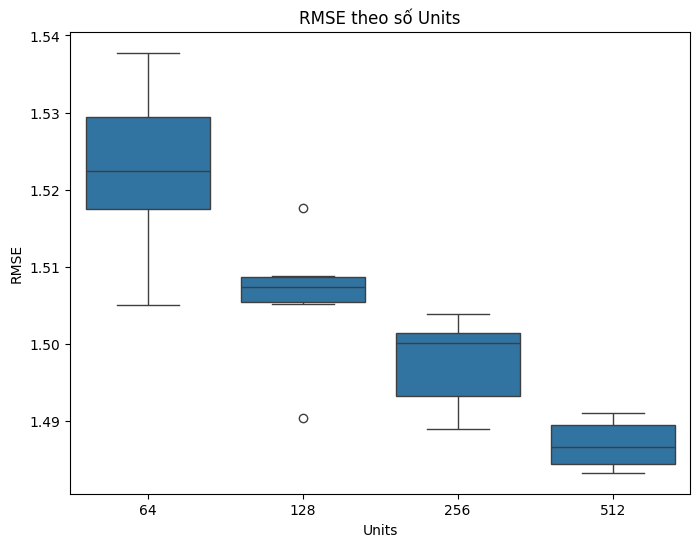

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=results_df, x='Units', y='RMSE')
plt.title('RMSE theo s·ªë Units')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/rmse_by_units.png', dpi=300)
plt.show()

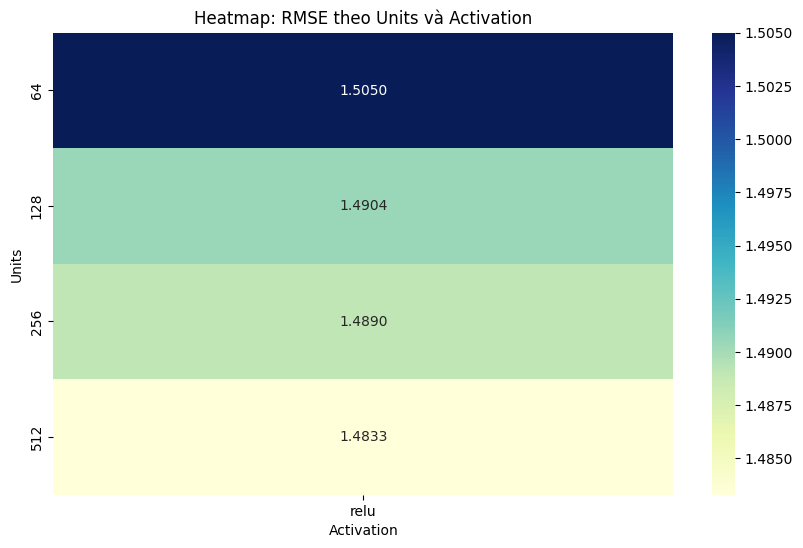

In [ ]:
pivot_table = results_df.pivot_table(index='Units', columns='Activation', values='RMSE', aggfunc='min')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Heatmap: RMSE theo Units v√† Activation')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/heatmap_units_activation.png', dpi=300)
plt.show()

In [ ]:
best_config = min(results, key=lambda x: x[-1])
print(f"üèÜ Best config: units={best_config[0]}, dropout={best_config[1]}, lr={best_config[2]}, activation={best_config[3]}")
print(f"üëâ Best RMSE: {best_config[-1]:.4f}")

üèÜ Best config: units=512, dropout=0.3, lr=0.001, activation=relu
üëâ Best RMSE: 1.4833


In [ ]:
best_config = [512, 0.2, 0.001, 'relu']

In [ ]:
# Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh t·ªët nh·∫•t
best_model = Sequential([
    Dense(best_config[0], activation=best_config[3], kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(best_config[1]),
    Dense(1, activation='relu')

])

best_model.compile(optimizer=Adam(learning_rate=best_config[2]), loss='mse', metrics=['mae'])
best_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=64, verbose=1)

# L∆∞u
best_model.save("/content/drive/MyDrive/DoAnTotNghiep/test/best_manual_tuned_ann.h5", include_optimizer=False)

Epoch 1/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 6ms/step - loss: 10.2868 - mae: 2.4230 - val_loss: 2.6296 - val_mae: 1.2511
Epoch 2/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.6848 - mae: 1.2681 - val_loss: 2.5315 - val_mae: 1.2232
Epoch 3/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.5824 - mae: 1.2453 - val_loss: 2.4752 - val_mae: 1.2090
Epoch 4/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.5230 - mae: 1.2333 - val_loss: 2.4706 - val_mae: 1.2195
Epoch 5/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.5507 - mae: 1.2379 - val_loss: 2.4222 - val_mae: 1.2004
Epoch 6/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - loss: 2.4742 - mae: 1.2169 - val_loss: 2.4991 - val_mae: 1.2110
Epoch 7/100
331/331 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
best_model.save("/content/drive/MyDrive/DoAnTotNghiep/test/ann_model.keras")

In [ ]:
model.summary()
print(X_train_scaled.shape)
print(len(X_train_scaled[0]))

Model: "sequential_24"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_48 (Dense)                ‚îÇ (None, 512)            ‚îÇ        13,312 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_24 (Dropout)            ‚îÇ (None, 512)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_49 (Dense)                ‚îÇ (None, 1)              ‚îÇ           513 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 13,825 (54.00 KB)

 Trainable params: 13,825 (54.00 KB)

 Non-trainable params: 0 (0.00 B)

(21126, 25)
25


‚úÖ Found model. Loading...
166/166 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step
Optimized ANN (1 Hidden Layer) RMSE with 128 units: 1.49
MAPE: 25.23%


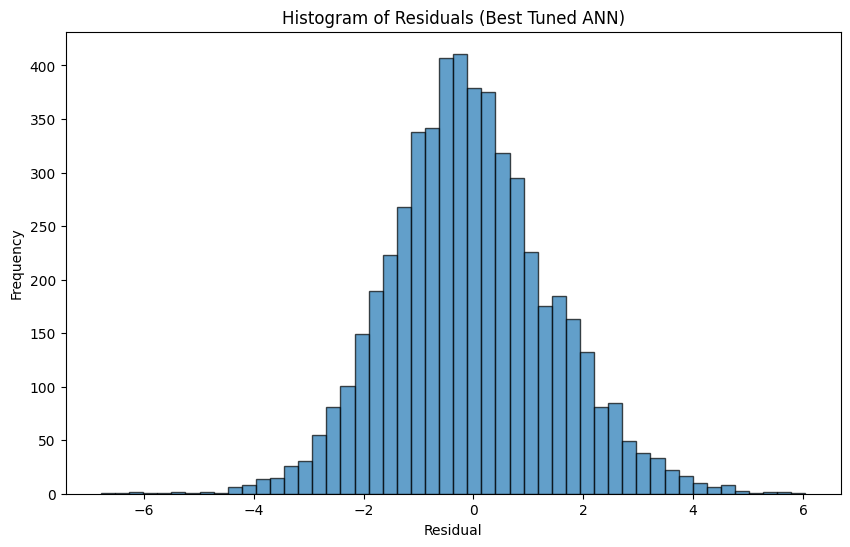

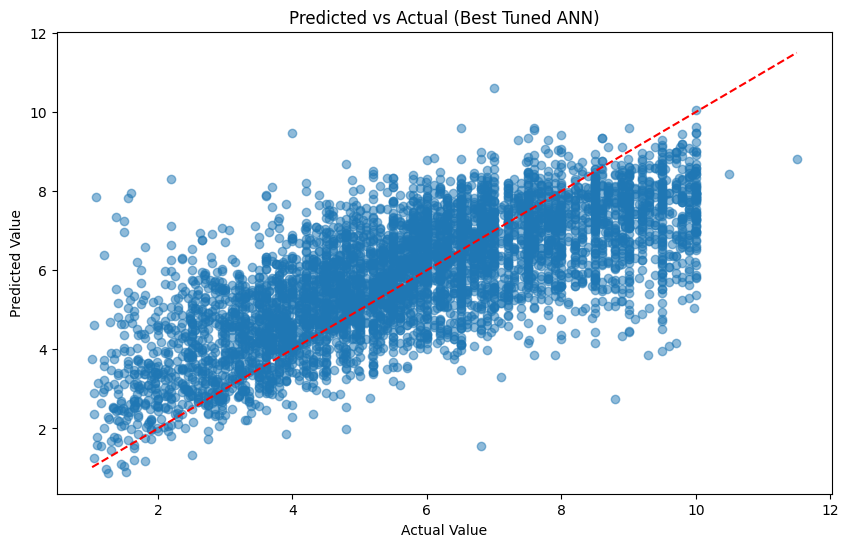

In [ ]:
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn m√¥ h√¨nh ƒë√£ l∆∞u
ann_model_path = '/content/drive/MyDrive/DoAnTotNghiep/test/best_manual_tuned_ann.h5'

# Load m√¥ h√¨nh v√† compile l·∫°i
if os.path.exists(ann_model_path):
    print("‚úÖ Found model. Loading...")
    model = load_model(ann_model_path, compile=False)
    model.compile(
        optimizer='adam',
        loss=MeanSquaredError(),
        metrics=[MeanAbsoluteError()]
    )

# D·ª± ƒëo√°n
y_pred_ann = model.predict(X_test_scaled)
y_pred_ann = y_pred_ann.flatten()

# T√≠nh RMSE
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print(f"Optimized ANN (1 Hidden Layer) RMSE with 128 units: {ann_rmse:.2f}")

# T√≠nh MAPE
ann_mape = mean_absolute_percentage_error(y_test, y_pred_ann)
print(f"MAPE: {ann_mape * 100:.2f}%")

# V·∫Ω residuals
residuals_ann = y_test - y_pred_ann
plt.figure(figsize=(10, 6))
plt.hist(residuals_ann, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals (Best Tuned ANN)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/residuals_ann_best.png', dpi=300, bbox_inches='tight')
plt.show()

# V·∫Ω bi·ªÉu ƒë·ªì Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Predicted vs Actual (Best Tuned ANN)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.savefig('/content/drive/MyDrive/DoAnTotNghiep/predictions_ann_best.png', dpi=300, bbox_inches='tight')
plt.show()

# Sau khi hu·∫•n luy·ªán v·ªõi s·ªë node kh√°c nhau ·ªü l·ªõp ·∫®n, k·∫øt lu·∫≠n ƒë∆∞·ª£c:

+ 128 Node ·∫©n l√† t·ªëi ∆∞u nh·∫•t v√¨ c√≥ th·ªùi gian hu·∫•n luy·ªán ng·∫Øn v√† cho ra k·∫øt qu·∫£ g·∫ßn ƒë√∫ng nh·∫•t (RMSE th·∫•p nh·∫•t (1.47) trong 6 tr∆∞·ªùng h·ª£p)
+ N·∫øu tƒÉng s·ªë node l√™n h∆°n 128 node th√¨ ch·ªâ g√¢y l√£ng ph√≠ t√†i nguy√™n nh∆∞ng kh√¥ng h·ªó tr·ª£ tƒÉng s·ª± ch√≠nh x√°c.

## NOTE NGO√ÄI:S·∫Ω ti·∫øp t·ª•c ch·ªânh s·ª≠a c√°c hyperparameter kh√°c trong qu√° tr√¨nh nghi√™n c·ª©u.

In [ ]:
print(f"Ridge Regression - MAPE: {ridge_mape *100:.2f}%, RMSE: {ridge_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"Lasso Regression - MAPE: {lasso_mape*100:.2f}%, RMSE: {lasso_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"XGBoost Regression - MAPE: {xgb_mape*100:.2f}%, RMSE: {xgb_rmse:.2f}")
print("-------------------------------------------------------------------")
print(f"ANN Regression - MAPE: {ann_mape*100:.2f}%, RMSE: {ann_rmse:.2f}")


Ridge Regression - MAPE: 29.65%, RMSE: 1.72
-------------------------------------------------------------------
Lasso Regression - MAPE: 29.92%, RMSE: 1.72
-------------------------------------------------------------------
XGBoost Regression - MAPE: 23.22%, RMSE: 1.42
-------------------------------------------------------------------
ANN Regression - MAPE: 25.43%, RMSE: 1.48


In [ ]:
feature_names = preprocessor.get_feature_names_out()
final_feature_list = list(feature_names)
print(len(final_feature_list))

25


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Area', 'Frontage', 'Access Road', 'Floors',
                                  'Bedrooms', 'Bathrooms', 'is_major_city',
                                  'is_center_district', 'Total Room',
                                  'Total Room + Floor', 'Bedrooms * Area',
                                  'Bathrooms * Area', 'Area_Floors',
                                  'High_Values Real Estate',
                                  'AveragePricePerSquare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Legal status', 'Furniture state',
                                  'region'])])

In [ ]:
# L∆∞u danh s√°ch c·ªôt ƒë·∫ßu v√†o
with open("/content/drive/MyDrive/DoAnTotNghiep/test/final_feature_list.pkl", "wb") as f:
    cloudpickle.dump(final_feature_list, f)

In [ ]:
X_test_scaled[:1]

array([[ 0.3518619 , -1.13508847, -0.84695677,  0.56364659,  1.4323331 ,
         1.53046912,  0.27476833, -0.4852946 ,  1.5923995 ,  1.4022989 ,
         1.37965198,  1.51668356,  1.11042141, -0.4852946 , -1.24197365,
         0.44904135, -0.41595071, -0.14397098, -0.47461973, -0.75498738,
         1.09866385, -0.30062301,  1.18085717, -0.02575131, -0.99763604]])

In [ ]:
print(best_model.predict(X_test_scaled[:10]))
print(y_test[:10])

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 176ms/step
[[6.0128055]
 [7.0018926]
 [6.4642797]
 [5.3319235]
 [7.6706595]
 [6.3755593]
 [5.754661 ]
 [6.9194407]
 [6.681512 ]
 [4.3166547]]
11637    6.50
11408    5.80
14373    5.20
2830     2.70
2777     8.95
18169    5.80
9208     4.30
11254    6.45
12437    8.80
5566     5.95
Name: Price, dtype: float64


In [ ]:
# Danh s√°ch v√πng mi·ªÅn
north = [
    'H√† N·ªôi', 'H·∫£i Ph√≤ng', 'Qu·∫£ng Ninh', 'B·∫Øc Ninh', 'B·∫Øc Giang', 'H√† Nam', 'Nam ƒê·ªãnh',
    'Th√°i B√¨nh', 'Ninh B√¨nh', 'H∆∞ng Y√™n', 'Vƒ©nh Ph√∫c', 'Ph√∫ Th·ªç', 'Tuy√™n Quang',
    'Th√°i Nguy√™n', 'Cao B·∫±ng', 'L·∫°ng S∆°n', 'H√† Giang', 'Y√™n B√°i', 'L√†o Cai', 'S∆°n La',
    'ƒêi·ªán Bi√™n', 'Lai Ch√¢u', 'B·∫Øc K·∫°n'
]

central = [
    'ƒê√† N·∫µng', 'Th·ª´a Thi√™n Hu·∫ø', 'Qu·∫£ng Nam', 'Qu·∫£ng Ng√£i', 'B√¨nh ƒê·ªãnh', 'Ph√∫ Y√™n',
    'Kh√°nh H√≤a', 'Ninh Thu·∫≠n', 'B√¨nh Thu·∫≠n', 'Kon Tum', 'Gia Lai', 'ƒê·∫Øk L·∫Øk',
    'ƒê·∫Øk N√¥ng', 'L√¢m ƒê·ªìng', 'Thanh H√≥a', 'Ngh·ªá An', 'H√† Tƒ©nh', 'Qu·∫£ng B√¨nh',
    'Qu·∫£ng Tr·ªã'
]

south = [
    'H·ªì Ch√≠ Minh', 'TP. HCM', 'HCM', 'C·∫ßn Th∆°', 'B√¨nh D∆∞∆°ng', 'B√¨nh Ph∆∞·ªõc', 'ƒê·ªìng Nai',
    'T√¢y Ninh', 'B√† R·ªãa V≈©ng T√†u', 'Long An', 'Ti·ªÅn Giang', 'B·∫øn Tre', 'Vƒ©nh Long',
    'Tr√† Vinh', 'H·∫≠u Giang', 'S√≥c TrƒÉng', 'An Giang', 'ƒê·ªìng Th√°p', 'C√† Mau', 'B·∫°c Li√™u',
    'Ki√™n Giang'
]

# Th√†nh ph·ªë l·ªõn v√† qu·∫≠n trung t√¢m
major_cities = {
    'H·ªì Ch√≠ Minh': ['Qu·∫≠n 1', 'Qu·∫≠n 3', 'Qu·∫≠n 5', 'Qu·∫≠n 10', 'B√¨nh Th·∫°nh', 'Ph√∫ Nhu·∫≠n', 'Qu·∫≠n 7'],
    'H√† N·ªôi': ['Ba ƒê√¨nh', 'Ho√†n Ki·∫øm', 'ƒê·ªëng ƒêa', 'Hai B√† Tr∆∞ng', 'C·∫ßu Gi·∫•y', 'Thanh Xu√¢n', 'T√¢y H·ªì'],
    'ƒê√† N·∫µng': ['H·∫£i Ch√¢u'],
    'C·∫ßn Th∆°': ['Ninh Ki·ªÅu'],
    'B√¨nh D∆∞∆°ng': ['Th·ªß D·∫ßu M·ªôt'],
    'H·∫£i Ph√≤ng': ['H·ªìng B√†ng', 'L√™ Ch√¢n'],
    'Kh√°nh H√≤a': ['Nha Trang'],
    'Qu·∫£ng Ninh': ['H·∫° Long']
}

def get_region(province):
    if province in north:
        return 'North'
    elif province in central:
        return 'Central'
    elif province in south:
        return 'South'
    return 'Other'

def prepare_input(form_input):
    address = form_input['address']
    province = address.split(',')[-1].strip()

    # X√°c ƒë·ªãnh region
    region = get_region(province)

    # Th√†nh ph·ªë l·ªõn v√† qu·∫≠n trung t√¢m
    city = province
    is_major = 1 if city in major_cities else 0
    is_center = 0
    if is_major:
        is_center = any(district in address for district in major_cities[city])

    # DataFrame ƒë·∫ßu v√†o
    df = pd.DataFrame([{
        'Area': form_input['area'],
        'Frontage': form_input['frontage'],
        'Access Road': form_input['access_road'],
        'Floors': form_input['floors'],
        'Bedrooms': form_input['bedrooms'],
        'Bathrooms': form_input['bathrooms'],
        'Legal status': form_input['legal_status'],
        'Furniture state': form_input['furniture_state'],
        'is_major_city': is_major,
        'is_center_district': is_center,
        'region': region,
        'Total Room': form_input['bedrooms'] + form_input['bathrooms'],
        'Total Room + Floor': form_input['bedrooms'] + form_input['bathrooms'] + form_input['floors'],
        'Bedrooms * Area': form_input['bedrooms'] * form_input['area'],
        'Bathrooms * Area': form_input['bathrooms'] * form_input['area'],
        'Area_Floors': form_input['area'] * form_input['floors'],
        'High_Values Real Estate': is_major * is_center,
        'AveragePricePerSquare': 0
    }])

    # Ti·ªÅn x·ª≠ l√Ω
    X_ready = preprocessor.transform(df)

    # ƒê·∫£m b·∫£o ƒë·∫ßu v√†o ƒë√∫ng ƒë·ªãnh d·∫°ng
    if isinstance(X_ready, pd.DataFrame):
        X_ready = X_ready[feature_list]
    else:
        X_ready = pd.DataFrame(X_ready, columns=feature_list)

    return X_ready


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 150ms/step

‚úÖ K·∫øt qu·∫£ d·ª± ƒëo√°n: 0.00 t·ª∑ VND
   num__Area  num__Frontage  num__Access Road  num__Floors  num__Bedrooms  num__Bathrooms  num__is_major_city  num__is_center_district  num__Total Room  num__Total Room + Floor  num__Bedrooms * Area  num__Bathrooms * Area  num__Area_Floors  num__High_Values Real Estate  num__AveragePricePerSquare  cat__Legal status_Have certificate  cat__Legal status_None  cat__Legal status_Sale contract  cat__Furniture state_Basic  cat__Furniture state_Full  cat__Furniture state_None  cat__region_Central  cat__region_North  cat__region_Other  cat__region_South
0   0.593625        -0.3243          1.269997     -0.81672      -0.739469       -0.509579            0.274865                 2.049755        -0.666876                -0.821287             -0.262981              -0.117468         -0.295914                      2.049755                   -3.376948                             